In [3]:
import databento as db
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns

In [4]:
import sys
print(sys.executable)

/Users/samanvayms/opt/anaconda3/envs/MM_env/bin/python


In [5]:
load_dotenv()

True

In [6]:
api_key = os.getenv("Databento_api_key_1")

In [7]:
client = db.Historical(api_key) # set the client using the api key

## Components of db Historical

In [8]:
DATASETS = client.metadata.list_datasets() # print all available datasets in the client
print(DATASETS)

['DBEQ.BASIC', 'GLBX.MDP3', 'OPRA.PILLAR', 'XNAS.ITCH']


In [9]:
schemas = client.metadata.list_schemas(dataset="XNAS.ITCH")
print(schemas)

['mbo', 'mbp-1', 'mbp-10', 'tbbo', 'trades', 'ohlcv-1s', 'ohlcv-1m', 'ohlcv-1h', 'ohlcv-1d', 'definition', 'imbalance']


Time format for data :- 
* yyyy-mm-dd, e.g. "2022-02-28" (midnight UTC)
* yyyy-mm-ddTHH:MM, e.g. "2022-02-28T23:50"
* yyyy-mm-ddTHH:MM:SS, e.g. "2022-02-28T23:50:59"
* yyyy-mm-ddTHH:MM:SS.NNNNNNNNN, e.g. "2022-02-28T23:50:59.123456789"

**important**
## NASDAQ Trading Hours

### Without Daylight Saving Time (Standard Time)
- **Eastern Standard Time (EST)** is UTC-5.
  - **Pre-Market**: 4:00 AM - 9:30 AM EST (9:00 AM - 2:30 PM UTC)
  - **Regular Market**: 9:30 AM - 4:00 PM EST (2:30 PM - 9:00 PM UTC)
  - **Post-Market (After-Hours)**: 4:00 PM - 8:00 PM EST (9:00 PM - 1:00 AM UTC)

### With Daylight Saving Time
- **Eastern Daylight Time (EDT)** is UTC-4.
  - **Pre-Market**: 4:00 AM - 9:30 AM EDT (8:00 AM - 1:30 PM UTC)
  - **Regular Market**: 9:30 AM - 4:00 PM EDT (1:30 PM - 8:00 PM UTC)
  - **Post-Market (After-Hours)**: 4:00 PM - 8:00 PM EDT (8:00 PM - 12:00 AM UTC)

*Note: Daylight Saving Time in the U.S. begins on the second Sunday in March and ends on the first Sunday in November. During this period, Eastern Daylight Time (EDT) is in effect. Outside of these dates, Eastern Standard Time (EST) is used.*



## look at jobs in the batch

### batch downloads can be used to download large quantity of data in batches.

In [10]:
jobs = client.batch.list_jobs(
    states=["queued", "processing", "done"],
    since="2022-06-01",
)
print(jobs)


[]


## download data directly

## Trades 

cost = client.metadata.get_cost(
    dataset="XNAS.ITCH",
    symbols=['AAPL'],
    schema="Trades",
    start="2023-10-25T12:00",
    end="2023-10-26T00:00",
)
print(cost)

data = client.timeseries.get_range(
    dataset="XNAS.ITCH",
    symbols=['AAPL'],
    schema="Trades",
    start="2023-10-25T12:00",
    end="2023-10-26T00:00",
)
df = data.to_df()
df.reset_index(inplace=True)
df.to_csv('test_data/trades.csv', index=False)

In [11]:
def get_data(client,dataset,symbol,schema,start,end,write = True):
    file_path = f'test_data/{dataset}_{symbol}_{schema}_{start}_{end}.csv'
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Read the existing CSV file
        df = pd.read_csv(file_path)
    else:
        data = client.timeseries.get_range(
            dataset=dataset,
            symbols=[symbol],
            schema=schema,
            start=start,
            end=end,
        )
        df = data.to_df()
        df.reset_index(inplace=True)
        if write:
            # Create the test_data directory if it doesn't exist
            os.makedirs(os.path.dirname(file_path), exist_ok=True)

            # Save the new DataFrame as a CSV
            df.to_csv(file_path, index=False)
    return df


In [12]:
def get_cost(client,dataset,symbol,schema,start,end):
    cost = client.metadata.get_cost(
            dataset=dataset,
            symbols=[symbol],
            schema=schema,
            start=start,
            end=end,
        )
    print('cost for this query is: ', cost)

In [13]:
get_cost(client,'XNAS.ITCH','AAPL','trades',start="2023-10-25T00:00",end="2023-10-26T00:00")

cost for this query is:  0.0440351665019989


In [14]:
df = get_data(client,'XNAS.ITCH','AAPL','trades',start="2023-10-25T00:00",end="2023-10-26T00:00")

In [15]:
df.head(10)

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,symbol
0,2023-10-25 08:00:11.883359114+00:00,2023-10-25 08:00:11.883191321+00:00,0,2,30,T,B,0,172.78,27,130,167793,318802,AAPL
1,2023-10-25 08:00:11.883455406+00:00,2023-10-25 08:00:11.883288096+00:00,0,2,30,T,N,0,172.70,50,130,167310,318809,AAPL
2,2023-10-25 08:00:12.576001498+00:00,2023-10-25 08:00:12.575831229+00:00,0,2,30,T,N,0,172.64,50,0,170269,319512,AAPL
3,2023-10-25 08:00:12.576001498+00:00,2023-10-25 08:00:12.575831229+00:00,0,2,30,T,N,0,172.62,50,0,170269,319513,AAPL
4,2023-10-25 08:00:12.576001498+00:00,2023-10-25 08:00:12.575831229+00:00,0,2,30,T,N,0,172.62,50,0,170269,319514,AAPL
5,2023-10-25 08:00:12.576036694+00:00,2023-10-25 08:00:12.575868632+00:00,0,2,30,T,B,0,172.60,50,130,168062,319516,AAPL
6,2023-10-25 08:00:12.576248976+00:00,2023-10-25 08:00:12.576080939+00:00,0,2,30,T,B,0,172.60,100,130,168037,319517,AAPL
7,2023-10-25 08:01:02.091261613+00:00,2023-10-25 08:01:02.091094158+00:00,0,2,30,T,N,0,172.75,25,130,167455,382375,AAPL
8,2023-10-25 08:01:03.309104819+00:00,2023-10-25 08:01:03.308936598+00:00,0,2,30,T,N,0,172.75,5,130,168221,385489,AAPL
9,2023-10-25 08:02:05.507270291+00:00,2023-10-25 08:02:05.507101008+00:00,0,2,30,T,N,0,172.71,1,130,169283,444035,AAPL


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98505 entries, 0 to 98504
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ts_recv        98505 non-null  object 
 1   ts_event       98505 non-null  object 
 2   rtype          98505 non-null  int64  
 3   publisher_id   98505 non-null  int64  
 4   instrument_id  98505 non-null  int64  
 5   action         98505 non-null  object 
 6   side           98505 non-null  object 
 7   depth          98505 non-null  int64  
 8   price          98505 non-null  float64
 9   size           98505 non-null  int64  
 10  flags          98505 non-null  int64  
 11  ts_in_delta    98505 non-null  int64  
 12  sequence       98505 non-null  int64  
 13  symbol         98505 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 10.5+ MB


In [17]:
df.describe()

,rtype,publisher_id,instrument_id,depth,price,size,flags,ts_in_delta,sequence
count,98505.0,98505.0,98505.0,98505.0,98505.000000,9.850500e+04,98505.000000,9.850500e+04,9.850500e+04
mean,0.0,2.0,30.0,0.0,171.564354,1.728860e+02,72.057500,1.759435e+05,3.590416e+08
std,0.0,0.0,0.0,0.0,0.584752,2.371413e+04,64.226894,4.715906e+04,2.254363e+08
min,0.0,2.0,30.0,0.0,169.300000,1.000000e+00,0.000000,1.668780e+05,3.188020e+05
25%,0.0,2.0,30.0,0.0,171.160000,2.000000e+01,0.000000,1.685920e+05,1.420927e+08
50%,0.0,2.0,30.0,0.0,171.400000,7.600000e+01,128.000000,1.704020e+05,3.625080e+08
75%,0.0,2.0,30.0,0.0,171.950000,1.000000e+02,130.000000,1.745310e+05,5.848210e+08
max,0.0,2.0,30.0,0.0,173.060000,7.429783e+06,130.000000,9.476059e+06,6.900113e+08


In [18]:
df.describe(include=['object'])

,ts_recv,ts_event,action,side,symbol
count,98505,98505,98505,98505,98505
unique,58989,59182,1,3,1
top,2023-10-25 13:33:00.684127664+00:00,2023-10-25 22:04:42.882006817+00:00,T,A,AAPL
freq,15,197,98505,44198,98505


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98505 entries, 0 to 98504
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ts_recv        98505 non-null  object 
 1   ts_event       98505 non-null  object 
 2   rtype          98505 non-null  int64  
 3   publisher_id   98505 non-null  int64  
 4   instrument_id  98505 non-null  int64  
 5   action         98505 non-null  object 
 6   side           98505 non-null  object 
 7   depth          98505 non-null  int64  
 8   price          98505 non-null  float64
 9   size           98505 non-null  int64  
 10  flags          98505 non-null  int64  
 11  ts_in_delta    98505 non-null  int64  
 12  sequence       98505 non-null  int64  
 13  symbol         98505 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 10.5+ MB


In [20]:
df['ts_event'] = pd.to_datetime(df['ts_event'])
df['ts_recv'] = pd.to_datetime(df['ts_recv'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98505 entries, 0 to 98504
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   ts_recv        98505 non-null  datetime64[ns, UTC]
 1   ts_event       98505 non-null  datetime64[ns, UTC]
 2   rtype          98505 non-null  int64              
 3   publisher_id   98505 non-null  int64              
 4   instrument_id  98505 non-null  int64              
 5   action         98505 non-null  object             
 6   side           98505 non-null  object             
 7   depth          98505 non-null  int64              
 8   price          98505 non-null  float64            
 9   size           98505 non-null  int64              
 10  flags          98505 non-null  int64              
 11  ts_in_delta    98505 non-null  int64              
 12  sequence       98505 non-null  int64              
 13  symbol         98505 non-null  object         

The order side. Can be [A]sk, [B]id or [N]one.


#### shows the location of the all the prices levels trades were happening

In [22]:
test_df = df[:1000]
test_df.sort_values(by=['ts_event'], inplace=True)

/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_62367/2293532146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.sort_values(by=['ts_event'], inplace=True)


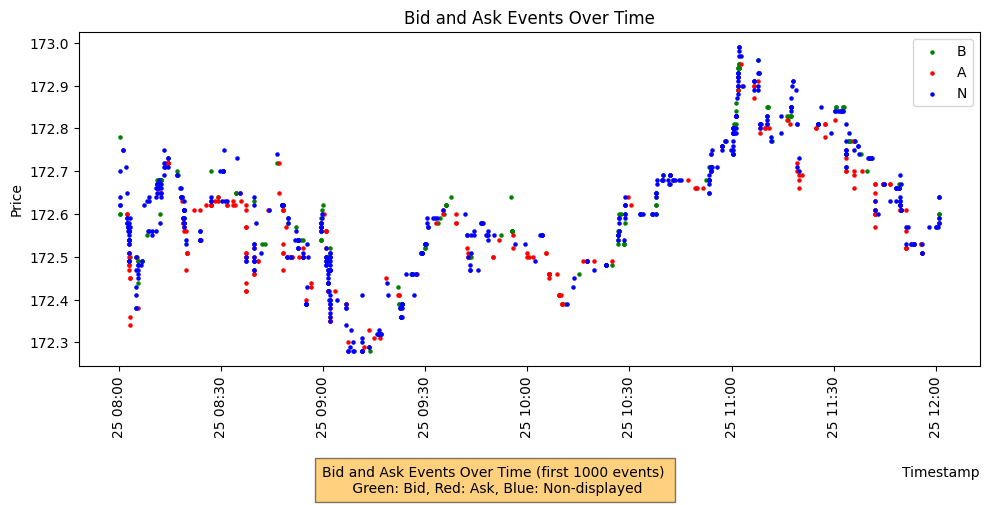

In [23]:
def plot_trades(df,text):
    color_map = {'B': 'green', 'A': 'red','N':'blue'}

    plt.figure(figsize=(10, 5))
    # Now plotting bid and ask events separately to associate labels
    for event_type, color in color_map.items():
        subset = df[df['side'] == event_type]
        plt.scatter(subset['ts_event'], subset['price'], s=5, c=color, label=event_type)
        
    plt.figtext(0.5, 0.005,text, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
    
    plt.legend()
    plt.xlabel('Timestamp', labelpad=20, loc='right')  # Assuming 'ts_event' is a timestamp. Adjust label as necessary.
    plt.xticks(rotation=90)
    plt.ylabel('Price')
    plt.title('Bid and Ask Events Over Time')
    plt.tight_layout()
    plt.show()
text = 'Bid and Ask Events Over Time (first 1000 events) \n Green: Bid, Red: Ask, Blue: Non-displayed'
plot_trades(test_df,text)

In [24]:
df.side.value_counts()

side
A    44198
B    37491
N    16816
Name: count, dtype: int64

## MBO

### preliminary analysis

In [25]:
get_cost(client,'XNAS.ITCH','AAPL','mbo',start="2023-10-25T00:00",end="2023-10-26T00:00")

cost for this query is:  0.42129103422164915


In [26]:
df1 = get_data(client,'XNAS.ITCH','AAPL','mbo',start="2023-10-25T00:00",end="2023-10-26T00:00",write=True)

In [27]:
df1.describe(include='all')

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
count,5532752,5532752,5532752.0,5532752.0,5532752.0,5532752,5532752,5.532752e+06,5.532752e+06,5532752.0,5.532752e+06,5.532752e+06,5.532752e+06,5.532752e+06,5532752
unique,3308856,3981563,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,2023-10-25 18:47:32.565270175+00:00,2023-10-25 22:04:42.882006817+00:00,NaN,NaN,NaN,C,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
freq,46,591,NaN,NaN,NaN,2684781,2820885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5532752
mean,NaN,NaN,160.0,2.0,30.0,NaN,NaN,1.722739e+02,1.204132e+02,0.0,3.144235e+08,7.950030e+01,1.700164e+05,3.394946e+08,NaN
std,NaN,NaN,0.0,0.0,0.0,NaN,NaN,2.690583e+02,3.172168e+03,0.0,1.920271e+08,6.309828e+01,3.754173e+04,1.973941e+08,NaN
min,NaN,NaN,160.0,2.0,30.0,NaN,NaN,1.000000e-04,1.000000e+00,0.0,0.000000e+00,0.000000e+00,1.657300e+05,2.948670e+05,NaN
25%,NaN,NaN,160.0,2.0,30.0,NaN,NaN,1.708100e+02,1.000000e+02,0.0,1.450894e+08,0.000000e+00,1.667810e+05,1.625143e+08,NaN
50%,NaN,NaN,160.0,2.0,30.0,NaN,NaN,1.715400e+02,1.000000e+02,0.0,3.030681e+08,1.280000e+02,1.676940e+05,3.282653e+08,NaN
75%,NaN,NaN,160.0,2.0,30.0,NaN,NaN,1.733700e+02,1.000000e+02,0.0,4.770992e+08,1.300000e+02,1.694430e+05,5.104903e+08,NaN


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5532752 entries, 0 to 5532751
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ts_recv        object 
 1   ts_event       object 
 2   rtype          int64  
 3   publisher_id   int64  
 4   instrument_id  int64  
 5   action         object 
 6   side           object 
 7   price          float64
 8   size           int64  
 9   channel_id     int64  
 10  order_id       int64  
 11  flags          int64  
 12  ts_in_delta    int64  
 13  sequence       int64  
 14  symbol         object 
dtypes: float64(1), int64(9), object(5)
memory usage: 633.2+ MB


In [29]:
df1.side.value_counts()

side
A    2820885
B    2695051
N      16816
Name: count, dtype: int64

In [30]:
df1.action.value_counts()

action
C    2684781
A    2667756
T      98505
F      81710
Name: count, dtype: int64

In [31]:
df1['flags'].value_counts()

flags
130    2673833
0      2138160
128     720759
Name: count, dtype: int64

In [32]:
df1['ts_event'] = pd.to_datetime(df1['ts_event'],unit='ns')
df1['ts_recv'] = pd.to_datetime(df1['ts_recv'],unit='ns')

In [33]:
(df1['ts_recv']-df1['ts_event']).head(10)

0   0 days 00:00:00.000166744
1   0 days 00:00:00.000167160
2   0 days 00:00:00.000167242
3   0 days 00:00:00.000201020
4   0 days 00:00:00.000234722
5   0 days 00:00:00.000167874
6   0 days 00:00:00.000174764
7   0 days 00:00:00.000167928
8   0 days 00:00:00.000168094
9   0 days 00:00:00.000166512
dtype: timedelta64[ns]

In [34]:
orders = df1.order_id.value_counts().index
print('total number of orders :- ', len(orders))

total number of orders :-  2667757


In [35]:
df1.action.value_counts()

action
C    2684781
A    2667756
T      98505
F      81710
Name: count, dtype: int64

### order message analysis

In [36]:
df1[df1['action']=='C'].side.value_counts()

side
A    1373348
B    1311433
Name: count, dtype: int64

In [37]:
df1[df1['action']=='A'].side.value_counts()

side
A    1365844
B    1301912
Name: count, dtype: int64

In [38]:
df1[df1['action']=='C'].head(10)

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
5,2023-10-25 08:00:00.083525324+00:00,2023-10-25 08:00:00.083357450+00:00,160,2,30,C,B,172.46,400,0,27465,130,167874,297055,AAPL
6,2023-10-25 08:00:00.083548177+00:00,2023-10-25 08:00:00.083373413+00:00,160,2,30,C,A,172.86,400,0,27833,128,174764,297058,AAPL
9,2023-10-25 08:00:00.124143304+00:00,2023-10-25 08:00:00.123976792+00:00,160,2,30,C,B,172.42,400,0,38473,130,166512,298845,AAPL
11,2023-10-25 08:00:00.193588155+00:00,2023-10-25 08:00:00.193421312+00:00,160,2,30,C,A,172.86,400,0,32573,130,166843,299522,AAPL
15,2023-10-25 08:00:00.262061166+00:00,2023-10-25 08:00:00.261894450+00:00,160,2,30,C,B,172.41,400,0,39385,130,166716,300232,AAPL
17,2023-10-25 08:00:00.502724635+00:00,2023-10-25 08:00:00.502557942+00:00,160,2,30,C,B,172.42,400,0,41873,130,166693,300962,AAPL
19,2023-10-25 08:00:00.766233981+00:00,2023-10-25 08:00:00.766067436+00:00,160,2,30,C,A,172.86,27,0,40569,130,166545,301575,AAPL
21,2023-10-25 08:00:00.823161969+00:00,2023-10-25 08:00:00.822995660+00:00,160,2,30,C,A,172.84,400,0,40225,130,166309,301658,AAPL
23,2023-10-25 08:00:01.252698993+00:00,2023-10-25 08:00:01.252532521+00:00,160,2,30,C,A,172.83,400,0,50393,130,166472,303577,AAPL
25,2023-10-25 08:00:01.266008138+00:00,2023-10-25 08:00:01.265841617+00:00,160,2,30,C,A,172.82,400,0,54697,130,166521,303611,AAPL


In [39]:
df1[df1['action']=='A'].head(10)

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
0,2023-10-25 08:00:00.012914846+00:00,2023-10-25 08:00:00.012748102+00:00,160,2,30,A,B,163.50,12,0,22037,130,166744,294867,AAPL
1,2023-10-25 08:00:00.035435443+00:00,2023-10-25 08:00:00.035268283+00:00,160,2,30,A,A,174.58,333,0,24741,130,167160,295894,AAPL
2,2023-10-25 08:00:00.036441220+00:00,2023-10-25 08:00:00.036273978+00:00,160,2,30,A,B,170.78,333,0,24857,130,167242,295914,AAPL
3,2023-10-25 08:00:00.079003778+00:00,2023-10-25 08:00:00.078802758+00:00,160,2,30,A,B,172.46,400,0,27465,130,201020,296403,AAPL
4,2023-10-25 08:00:00.079237430+00:00,2023-10-25 08:00:00.079002708+00:00,160,2,30,A,A,172.86,400,0,27833,130,234722,296413,AAPL
7,2023-10-25 08:00:00.083638115+00:00,2023-10-25 08:00:00.083470187+00:00,160,2,30,A,A,172.86,400,0,32573,130,167928,297082,AAPL
8,2023-10-25 08:00:00.113221317+00:00,2023-10-25 08:00:00.113053223+00:00,160,2,30,A,B,172.42,400,0,38473,130,168094,298765,AAPL
10,2023-10-25 08:00:00.139806153+00:00,2023-10-25 08:00:00.139638650+00:00,160,2,30,A,B,172.41,400,0,39385,130,167503,298999,AAPL
12,2023-10-25 08:00:00.193602354+00:00,2023-10-25 08:00:00.193434528+00:00,160,2,30,A,A,172.84,400,0,40225,128,167826,299523,AAPL
13,2023-10-25 08:00:00.206889157+00:00,2023-10-25 08:00:00.206722023+00:00,160,2,30,A,B,172.54,30,0,40421,130,167134,299709,AAPL


In [40]:
print('T:-',len(df1.query('action == "T"')))
print('F:-',len(df1.query('action == "F"')))

T:- 98505
F:- 81710


In [41]:
# Counting the number of rows with 'C' flag and preceded by 'F' flag without creating an additional column
count_f_before_c_no_column = sum((df1['action'].iloc[i] == 'C') and (df1['action'].iloc[i-1] == 'F') for i in range(1, len(df1)))

# Counting the number of rows with 'C' flag and not preceded by 'F' flag without creating an additional column
count_c_not_after_f_no_column = sum((df1['action'].iloc[i-1] == 'F') and (df1['action'].iloc[i] != 'C') for i in range(1, len(df1)))

count_f_before_c_no_column, count_c_not_after_f_no_column

(81710, 0)

So we see all fill messages have a corresponding cancel message.

In [42]:
# Counting the number of rows with 'F' flag and preceded by 'T' flag without creating an additional column
count_f_after_t_no_column = sum((df1['action'].iloc[i] == 'F') and (df1['action'].iloc[i-1] == 'T') for i in range(1, len(df1)))

# Counting the number of rows with 'F' flag and not preceded by 'T' flag without creating an additional column
count_f_not_after_t_no_column = sum((df1['action'].iloc[i] == 'F') and (df1['action'].iloc[i-1] != 'T') for i in range(1, len(df1)))

count_f_after_t_no_column, count_f_not_after_t_no_column

(81689, 21)

So we see all fill messages don't have a corresponding trade message. 81,689 have a trade-fill messages while 21 are only fill.

In [43]:
# Getting the indexes of rows where the flag is 'F' and not preceded by 'T'
indexes_f_not_after_t = [i for i in range(1, len(df1)) if (df1['action'].iloc[i] == 'F') and (df1['action'].iloc[i-1] != 'T')]
indexes_f_not_after_t

[39121,
 39123,
 39125,
 39127,
 39129,
 39131,
 39133,
 39135,
 39137,
 39139,
 39141,
 39143,
 39145,
 39147,
 39149,
 39151,
 5191465,
 5436730,
 5436732,
 5436734,
 5436736]

In [44]:
df1[39121:39154]

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
39121,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,F,B,171.78,200,0,23065701,0,173577,17591103,AAPL
39122,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,C,B,171.84,200,0,23065701,0,173577,17591103,AAPL
39123,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,F,B,171.78,100,0,23074337,0,173577,17591104,AAPL
39124,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,C,B,171.84,100,0,23074337,0,173577,17591104,AAPL
39125,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,F,B,171.78,100,0,23065709,0,173577,17591105,AAPL
39126,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,C,B,171.83,100,0,23065709,0,173577,17591105,AAPL
39127,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,F,B,171.78,50,0,23074053,0,173577,17591106,AAPL
39128,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,C,B,171.83,50,0,23074053,0,173577,17591106,AAPL
39129,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,F,B,171.78,1,0,23090605,130,173577,17591107,AAPL
39130,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,C,B,171.83,1,0,23090605,130,173577,17591107,AAPL


In [45]:
df1.query('order_id == 23065701')

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
39056,2023-10-25 13:30:00.529144510+00:00,2023-10-25 13:30:00.528972923+00:00,160,2,30,A,B,171.84,200,0,23065701,130,171587,17552096,AAPL
39121,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,F,B,171.78,200,0,23065701,0,173577,17591103,AAPL
39122,2023-10-25 13:30:00.621329929+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,C,B,171.84,200,0,23065701,0,173577,17591103,AAPL


In [46]:
df1.query('order_id == 23003777')

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
39037,2023-10-25 13:30:00.413637332+00:00,2023-10-25 13:30:00.413441467+00:00,160,2,30,A,B,171.82,100,0,23003777,128,195865,17473747,AAPL
39131,2023-10-25 13:30:00.621337047+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,F,B,171.78,100,0,23003777,0,180695,17591108,AAPL
39132,2023-10-25 13:30:00.621337047+00:00,2023-10-25 13:30:00.621156352+00:00,160,2,30,C,B,171.82,100,0,23003777,0,180695,17591108,AAPL


In [47]:
df1[5436725:5436740]

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
5436725,2023-10-25 20:00:00.081418755+00:00,2023-10-25 20:00:00.081247797+00:00,160,2,30,F,A,171.09,1,0,668245569,128,170958,682929686,AAPL
5436726,2023-10-25 20:00:00.081418755+00:00,2023-10-25 20:00:00.081247797+00:00,160,2,30,C,A,171.10,1,0,668245569,128,170958,682929686,AAPL
5436727,2023-10-25 20:00:00.177841842+00:00,2023-10-25 20:00:00.177666602+00:00,160,2,30,A,B,163.40,100,0,668324133,128,175240,683021577,AAPL
5436728,2023-10-25 20:00:00.177929753+00:00,2023-10-25 20:00:00.177740934+00:00,160,2,30,A,A,178.79,100,0,668324137,128,188819,683021681,AAPL
5436729,2023-10-25 20:00:00.187222396+00:00,2023-10-25 20:00:00.187039917+00:00,160,2,30,A,A,196.87,6,0,668326121,128,182479,683030185,AAPL
5436730,2023-10-25 20:00:00.205556447+00:00,2023-10-25 20:00:00.205378277+00:00,160,2,30,F,A,171.10,1537,0,668245569,0,178170,683049559,AAPL
5436731,2023-10-25 20:00:00.205556447+00:00,2023-10-25 20:00:00.205378277+00:00,160,2,30,C,A,171.10,1537,0,668245569,0,178170,683049559,AAPL
5436732,2023-10-25 20:00:00.205556447+00:00,2023-10-25 20:00:00.205378277+00:00,160,2,30,F,A,171.10,2435,0,668245573,0,178170,683049560,AAPL
5436733,2023-10-25 20:00:00.205556447+00:00,2023-10-25 20:00:00.205378277+00:00,160,2,30,C,A,171.10,2435,0,668245573,0,178170,683049560,AAPL
5436734,2023-10-25 20:00:00.205556447+00:00,2023-10-25 20:00:00.205378277+00:00,160,2,30,F,A,171.10,100,0,668251545,0,178170,683049561,AAPL


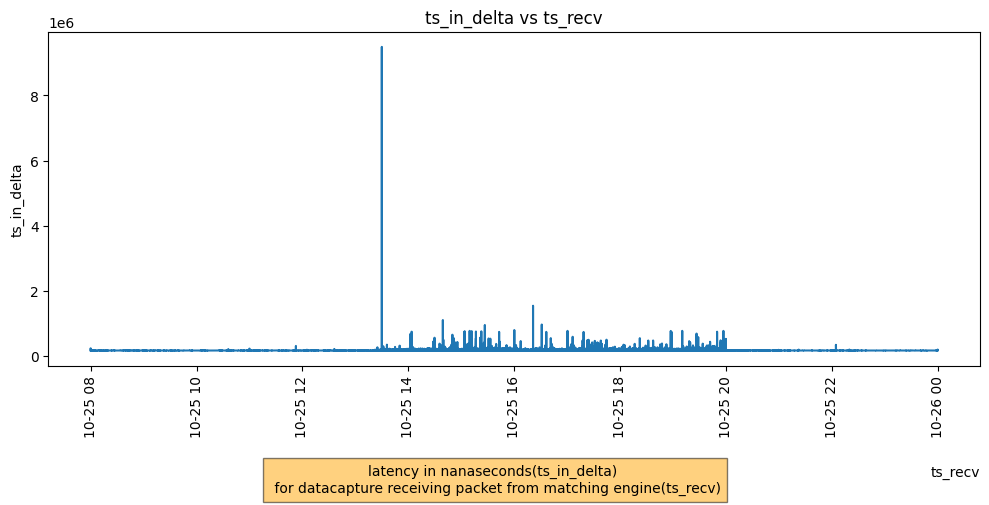

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(df1['ts_recv'], df1['ts_in_delta'])
plt.xlabel('ts_recv', labelpad=20, loc='right')
plt.xticks(rotation=90)
plt.ylabel('ts_in_delta')
plt.title('ts_in_delta vs ts_recv')
text = 'latency in nanaseconds(ts_in_delta) \n for datacapture receiving packet from matching engine(ts_recv)'
plt.figtext(0.5, 0.005,text, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.tight_layout()
plt.show()

In [49]:
df1.query('action == "T" & side != "N"').head(10)

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
236,2023-10-25 08:00:11.883359114+00:00,2023-10-25 08:00:11.883191321+00:00,160,2,30,T,B,172.78,27,0,0,130,167793,318802,AAPL
271,2023-10-25 08:00:12.576036694+00:00,2023-10-25 08:00:12.575868632+00:00,160,2,30,T,B,172.60,50,0,0,130,168062,319516,AAPL
274,2023-10-25 08:00:12.576248976+00:00,2023-10-25 08:00:12.576080939+00:00,160,2,30,T,B,172.60,100,0,0,130,168037,319517,AAPL
1198,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,T,A,172.60,1,0,0,0,169314,451276,AAPL
1201,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,T,A,172.60,1,0,0,0,169314,451277,AAPL
1336,2023-10-25 08:02:47.403567120+00:00,2023-10-25 08:02:47.403395070+00:00,160,2,30,T,A,172.51,28,0,0,0,172050,488471,AAPL
1339,2023-10-25 08:02:47.403567120+00:00,2023-10-25 08:02:47.403395070+00:00,160,2,30,T,A,172.51,48,0,0,130,172050,488472,AAPL
1354,2023-10-25 08:02:48.402954814+00:00,2023-10-25 08:02:48.402785453+00:00,160,2,30,T,A,172.57,100,0,0,0,169361,489276,AAPL
1398,2023-10-25 08:02:53.403648354+00:00,2023-10-25 08:02:53.403475817+00:00,160,2,30,T,A,172.50,1,0,0,0,172537,494199,AAPL
1404,2023-10-25 08:02:53.403648354+00:00,2023-10-25 08:02:53.403475817+00:00,160,2,30,T,A,172.48,37,0,0,130,172537,494203,AAPL


In [50]:
events = df1.query('action == "T" & side == "N"')['ts_event'].to_list()

In [51]:
len(set(events))

15136

In [52]:
df1[df1['ts_event'].isin(events)].query('action == "F"').head()

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
1199,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,F,B,172.60,1,0,194201,0,169314,451276,AAPL
1202,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,F,B,172.60,1,0,212037,0,169314,451277,AAPL
1337,2023-10-25 08:02:47.403567120+00:00,2023-10-25 08:02:47.403395070+00:00,160,2,30,F,B,172.51,28,0,272737,0,172050,488471,AAPL
1340,2023-10-25 08:02:47.403567120+00:00,2023-10-25 08:02:47.403395070+00:00,160,2,30,F,B,172.51,48,0,272789,130,172050,488472,AAPL
1355,2023-10-25 08:02:48.402954814+00:00,2023-10-25 08:02:48.402785453+00:00,160,2,30,F,B,172.57,100,0,273897,0,169361,489276,AAPL


In [53]:
df1[1195:1210]

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
1195,2023-10-25 08:02:10.399465073+00:00,2023-10-25 08:02:10.399298289+00:00,160,2,30,C,A,172.94,30,0,244413,130,166784,450287,AAPL
1196,2023-10-25 08:02:10.419247934+00:00,2023-10-25 08:02:10.419081404+00:00,160,2,30,C,B,172.53,400,0,248853,130,166530,450331,AAPL
1197,2023-10-25 08:02:10.419259998+00:00,2023-10-25 08:02:10.419093339+00:00,160,2,30,A,B,172.54,400,0,249617,130,166659,450332,AAPL
1198,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,T,A,172.60,1,0,0,0,169314,451276,AAPL
1199,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,F,B,172.60,1,0,194201,0,169314,451276,AAPL
1200,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,C,B,172.60,1,0,194201,0,169314,451276,AAPL
1201,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,T,A,172.60,1,0,0,0,169314,451277,AAPL
1202,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,F,B,172.60,1,0,212037,0,169314,451277,AAPL
1203,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,C,B,172.60,1,0,212037,0,169314,451277,AAPL
1204,2023-10-25 08:02:10.809597257+00:00,2023-10-25 08:02:10.809427943+00:00,160,2,30,T,N,172.59,50,0,0,130,169314,451278,AAPL


In [54]:
# Ensure that 'ts_recv' and 'ts_event' are in datetime format and 'ts_in_delta' is numeric
df1['ts_recv'] = pd.to_datetime(df1['ts_recv'], unit='ns')
df1['ts_event'] = pd.to_datetime(df1['ts_event'], unit='ns')
df1['ts_in_delta'] = pd.to_numeric(df1['ts_in_delta'], errors='coerce')

# Calculate delta
delta = (df1['ts_recv'] - df1['ts_event']) - pd.to_timedelta(df1['ts_in_delta'], unit='ns')

### order type analysis

[A]dd, [C]ancel, [M]odify, clea[R] book, [T]rade, or [F]ill.

In [55]:
test_df1 = df1[:1000]

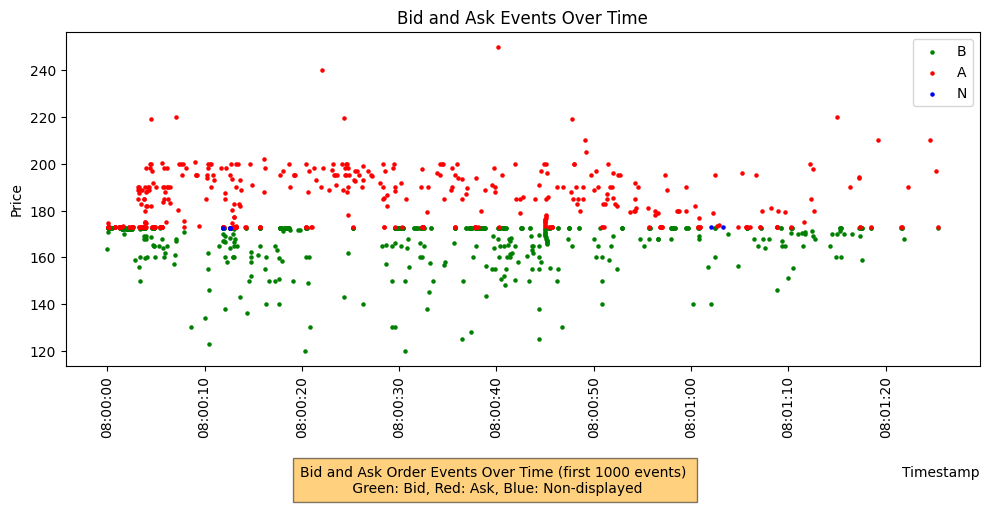

In [56]:
text = "Bid and Ask Order Events Over Time (first 1000 events) \n Green: Bid, Red: Ask, Blue: Non-displayed"
plot_trades(test_df1,text)

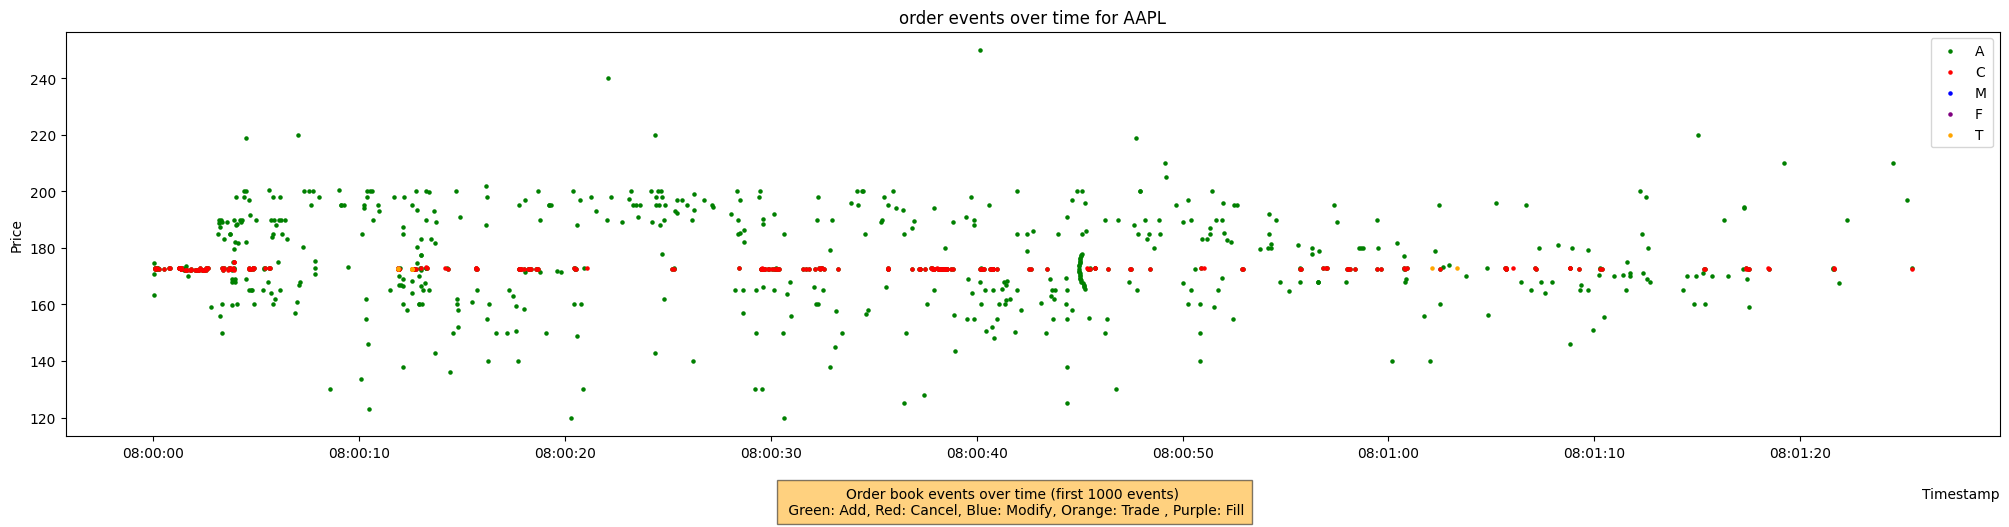

In [57]:
color_map = {'A': 'green', 'C': 'red', 'M': 'blue', 'F': 'purple', 'T': 'orange'}

plt.figure(figsize=(20, 5))
# Now plotting bid and ask events separately to associate labels
for event_type, color in color_map.items():
    subset = test_df1[test_df1['action'] == event_type]
    plt.scatter(subset['ts_recv'], subset['price'], s=5, c=color, label=event_type)
text = 'Order book events over time (first 1000 events) \n Green: Add, Red: Cancel, Blue: Modify, Orange: Trade , Purple: Fill'
plt.figtext(0.5, 0.005,text, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.legend()
plt.xlabel('Timestamp', labelpad=20, loc='right')  # Assuming 'ts_event' is a timestamp. Adjust label as necessary.
plt.tight_layout()
plt.ylabel('Price')
plt.title('order events over time for AAPL')
plt.show()

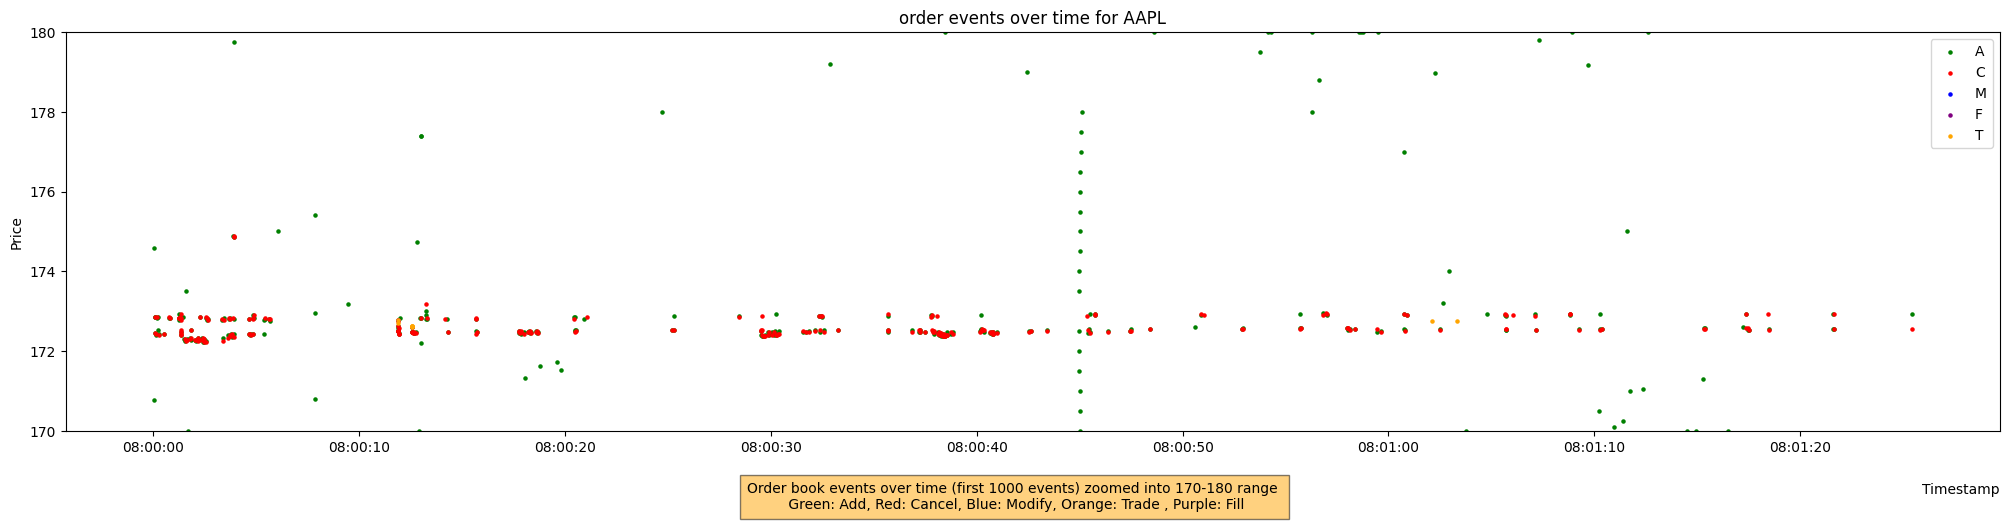

In [58]:
color_map = {'A': 'green', 'C': 'red', 'M': 'blue', 'F': 'purple', 'T': 'orange'}

plt.figure(figsize=(20, 5))
# Now plotting bid and ask events separately to associate labels
for event_type, color in color_map.items():
    subset = test_df1[test_df1['action'] == event_type]
    plt.scatter(subset['ts_recv'], subset['price'], s=5, c=color, label=event_type)
text = 'Order book events over time (first 1000 events) zoomed into 170-180 range \n Green: Add, Red: Cancel, Blue: Modify, Orange: Trade , Purple: Fill'
plt.figtext(0.5, 0.005,text, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.ylim(170,180)
plt.legend()
plt.xlabel('Timestamp', labelpad=20, loc='right')  # Assuming 'ts_event' is a timestamp. Adjust label as necessary.
plt.tight_layout()
plt.ylabel('Price')
plt.title('order events over time for AAPL')
plt.show()

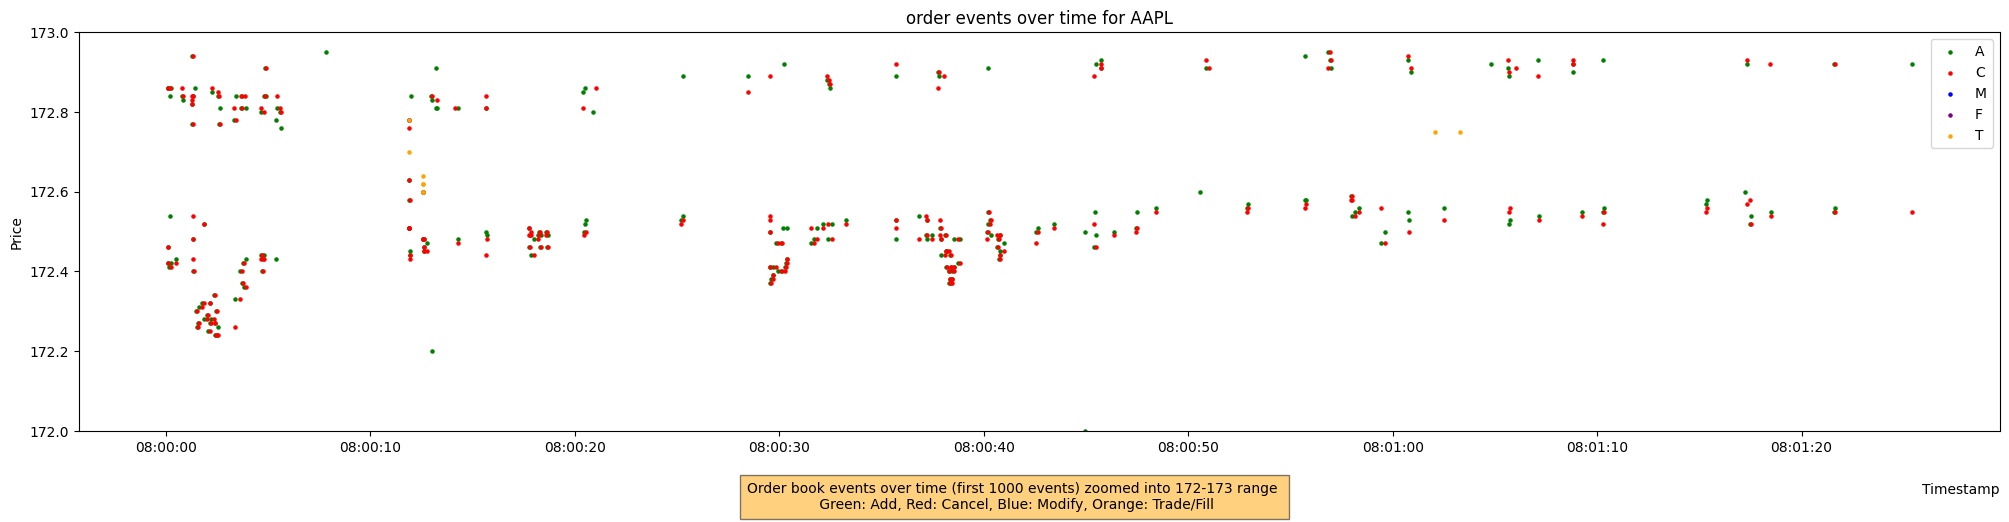

In [59]:
color_map = {'A': 'green', 'C': 'red', 'M': 'blue', 'F': 'purple', 'T': 'orange'}

plt.figure(figsize=(20, 5))
# Now plotting bid and ask events separately to associate labels
for event_type, color in color_map.items():
    subset = test_df1[test_df1['action'] == event_type]
    plt.scatter(subset['ts_recv'], subset['price'], s=5, c=color, label=event_type)
text = 'Order book events over time (first 1000 events) zoomed into 172-173 range \n Green: Add, Red: Cancel, Blue: Modify, Orange: Trade/Fill'
plt.figtext(0.5, 0.005,text, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.ylim(172,173)
plt.legend()
plt.xlabel('Timestamp', labelpad=20, loc='right')  # Assuming 'ts_event' is a timestamp. Adjust label as necessary.
plt.tight_layout()
plt.ylabel('Price')
plt.title('order events over time for AAPL')
plt.show()

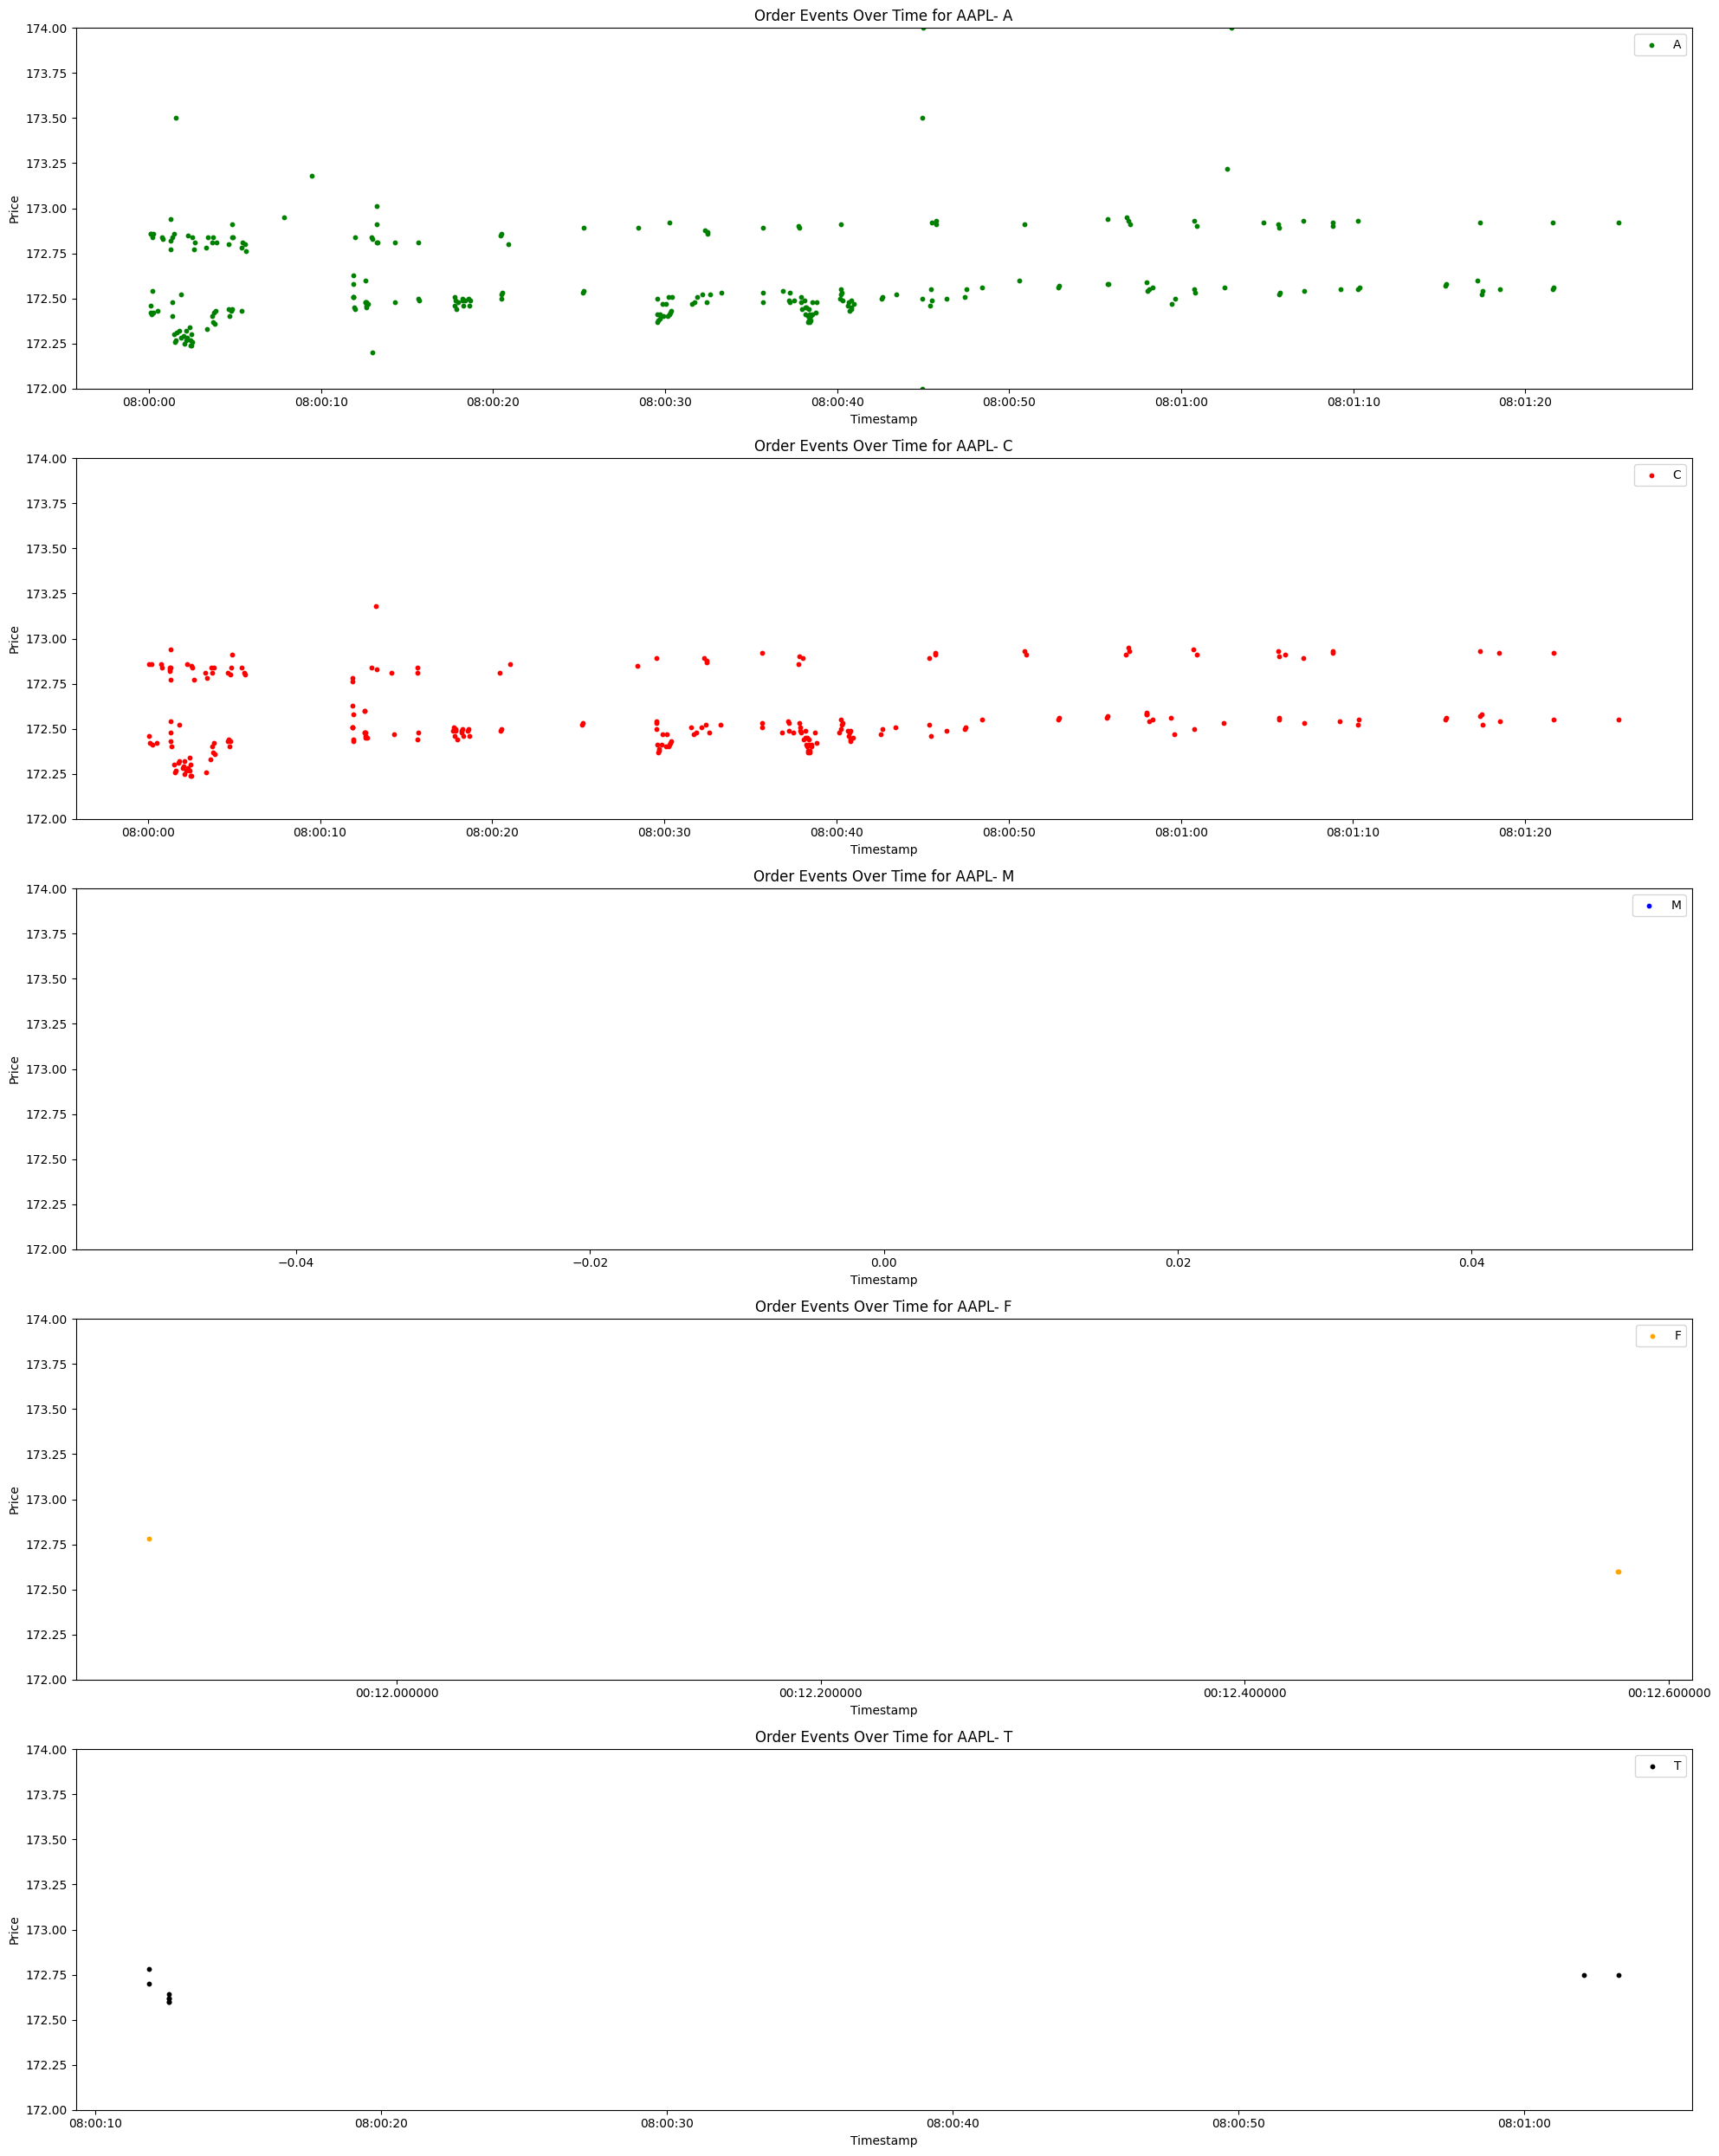

In [60]:
color_map = {'A': 'green', 'C': 'red', 'M': 'blue', 'F': 'orange', 'T': 'black'}

# Determine the number of rows and columns for the subplot grid
n = len(color_map)
ncols = 1  # Number of columns
nrows = n  # Number of rows; one row per event type

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * n))  # Adjusting figure size based on number of subplots

for i, (event_type, color) in enumerate(color_map.items()):
    subset = test_df1[test_df1['action'] == event_type]

    axs[i].scatter(subset['ts_recv'], subset['price'], s=10, c=color, label=event_type)
    axs[i].set_ylim(172, 174)  # Zooming in to range based on where trades occurred in earlier plot
    axs[i].legend()
    axs[i].set_xlabel('Timestamp')  # Assuming 'ts_event' is a timestamp. Adjust label as necessary.
    axs[i].set_ylabel('Price')
    axs[i].set_title('Order Events Over Time for AAPL' + f'- {event_type}')

plt.tight_layout()  # Adjusts spacing between subplots for better readability
plt.show()


### Possible Algorithmic orders 

In [61]:
# possible HFT orders 
HFT_orders = orders[df1.order_id.value_counts().values < 3] # order manipulated more than once 
HFT_orders

Index([426224705, 426250977, 426208829, 315053769, 426249541, 426240917,
       428882901, 426244265, 315053765, 428870261,
       ...
       660831637,  34708017, 660833533, 660833889, 660833921, 660835573,
       660836509, 660838617, 660839893, 671731105],
      dtype='int64', name='order_id', length=2596747)

In [62]:
print('total number of HFT orders :- ', len(HFT_orders))

total number of HFT orders :-  2596747


In [63]:
HFT_df = df1[df1.order_id.isin(HFT_orders)]

In [64]:
print('percentage of HFT orders out of total:- ', len(HFT_orders)/len(orders)*100)
print('percentage of HFT order messages out of total:- ', len(HFT_df)/len(df1)*100)

percentage of HFT orders out of total:-  97.33821333802142
percentage of HFT order messages out of total:-  93.81324158393508


In [65]:
test_HFT_df = HFT_df[1250000:1251000]

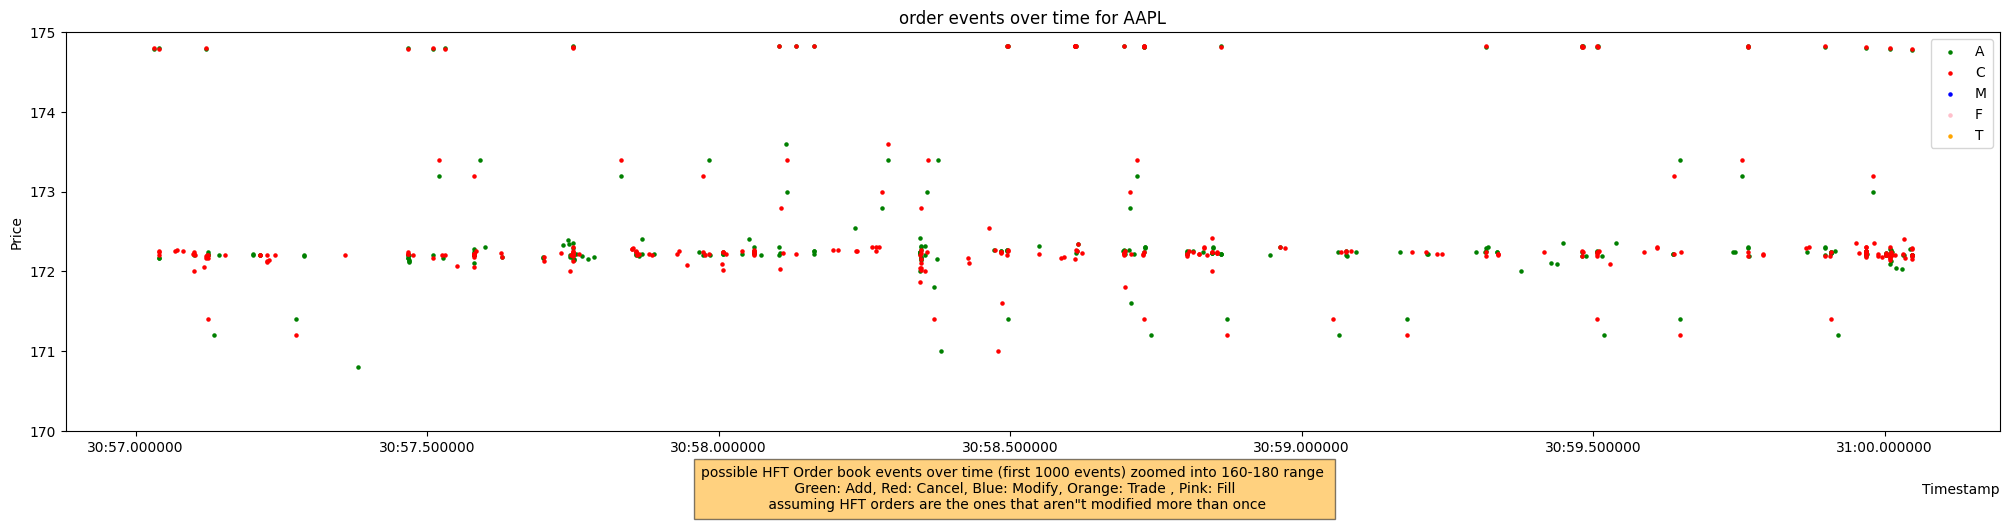

In [66]:
color_map = {'A': 'green', 'C': 'red', 'M': 'blue', 'F': 'pink', 'T': 'orange'}

plt.figure(figsize=(20, 5))
# Now plotting bid and ask events separately to associate labels
for event_type, color in color_map.items():
    subset = test_HFT_df[test_HFT_df['action'] == event_type]
    plt.scatter(subset['ts_recv'], subset['price'], s=5, c=color, label=event_type)
text = 'possible HFT Order book events over time (first 1000 events) zoomed into 160-180 range \n Green: Add, Red: Cancel, Blue: Modify, Orange: Trade , Pink: Fill \n assuming HFT orders are the ones that aren"t modified more than once'
plt.figtext(0.5, 0.005,text, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.ylim(170,175)
plt.legend()
plt.xlabel('Timestamp', labelpad=20, loc='right')  # Assuming 'ts_event' is a timestamp. Adjust label as necessary.
plt.tight_layout()
plt.ylabel('Price')
plt.title('order events over time for AAPL')
plt.show()

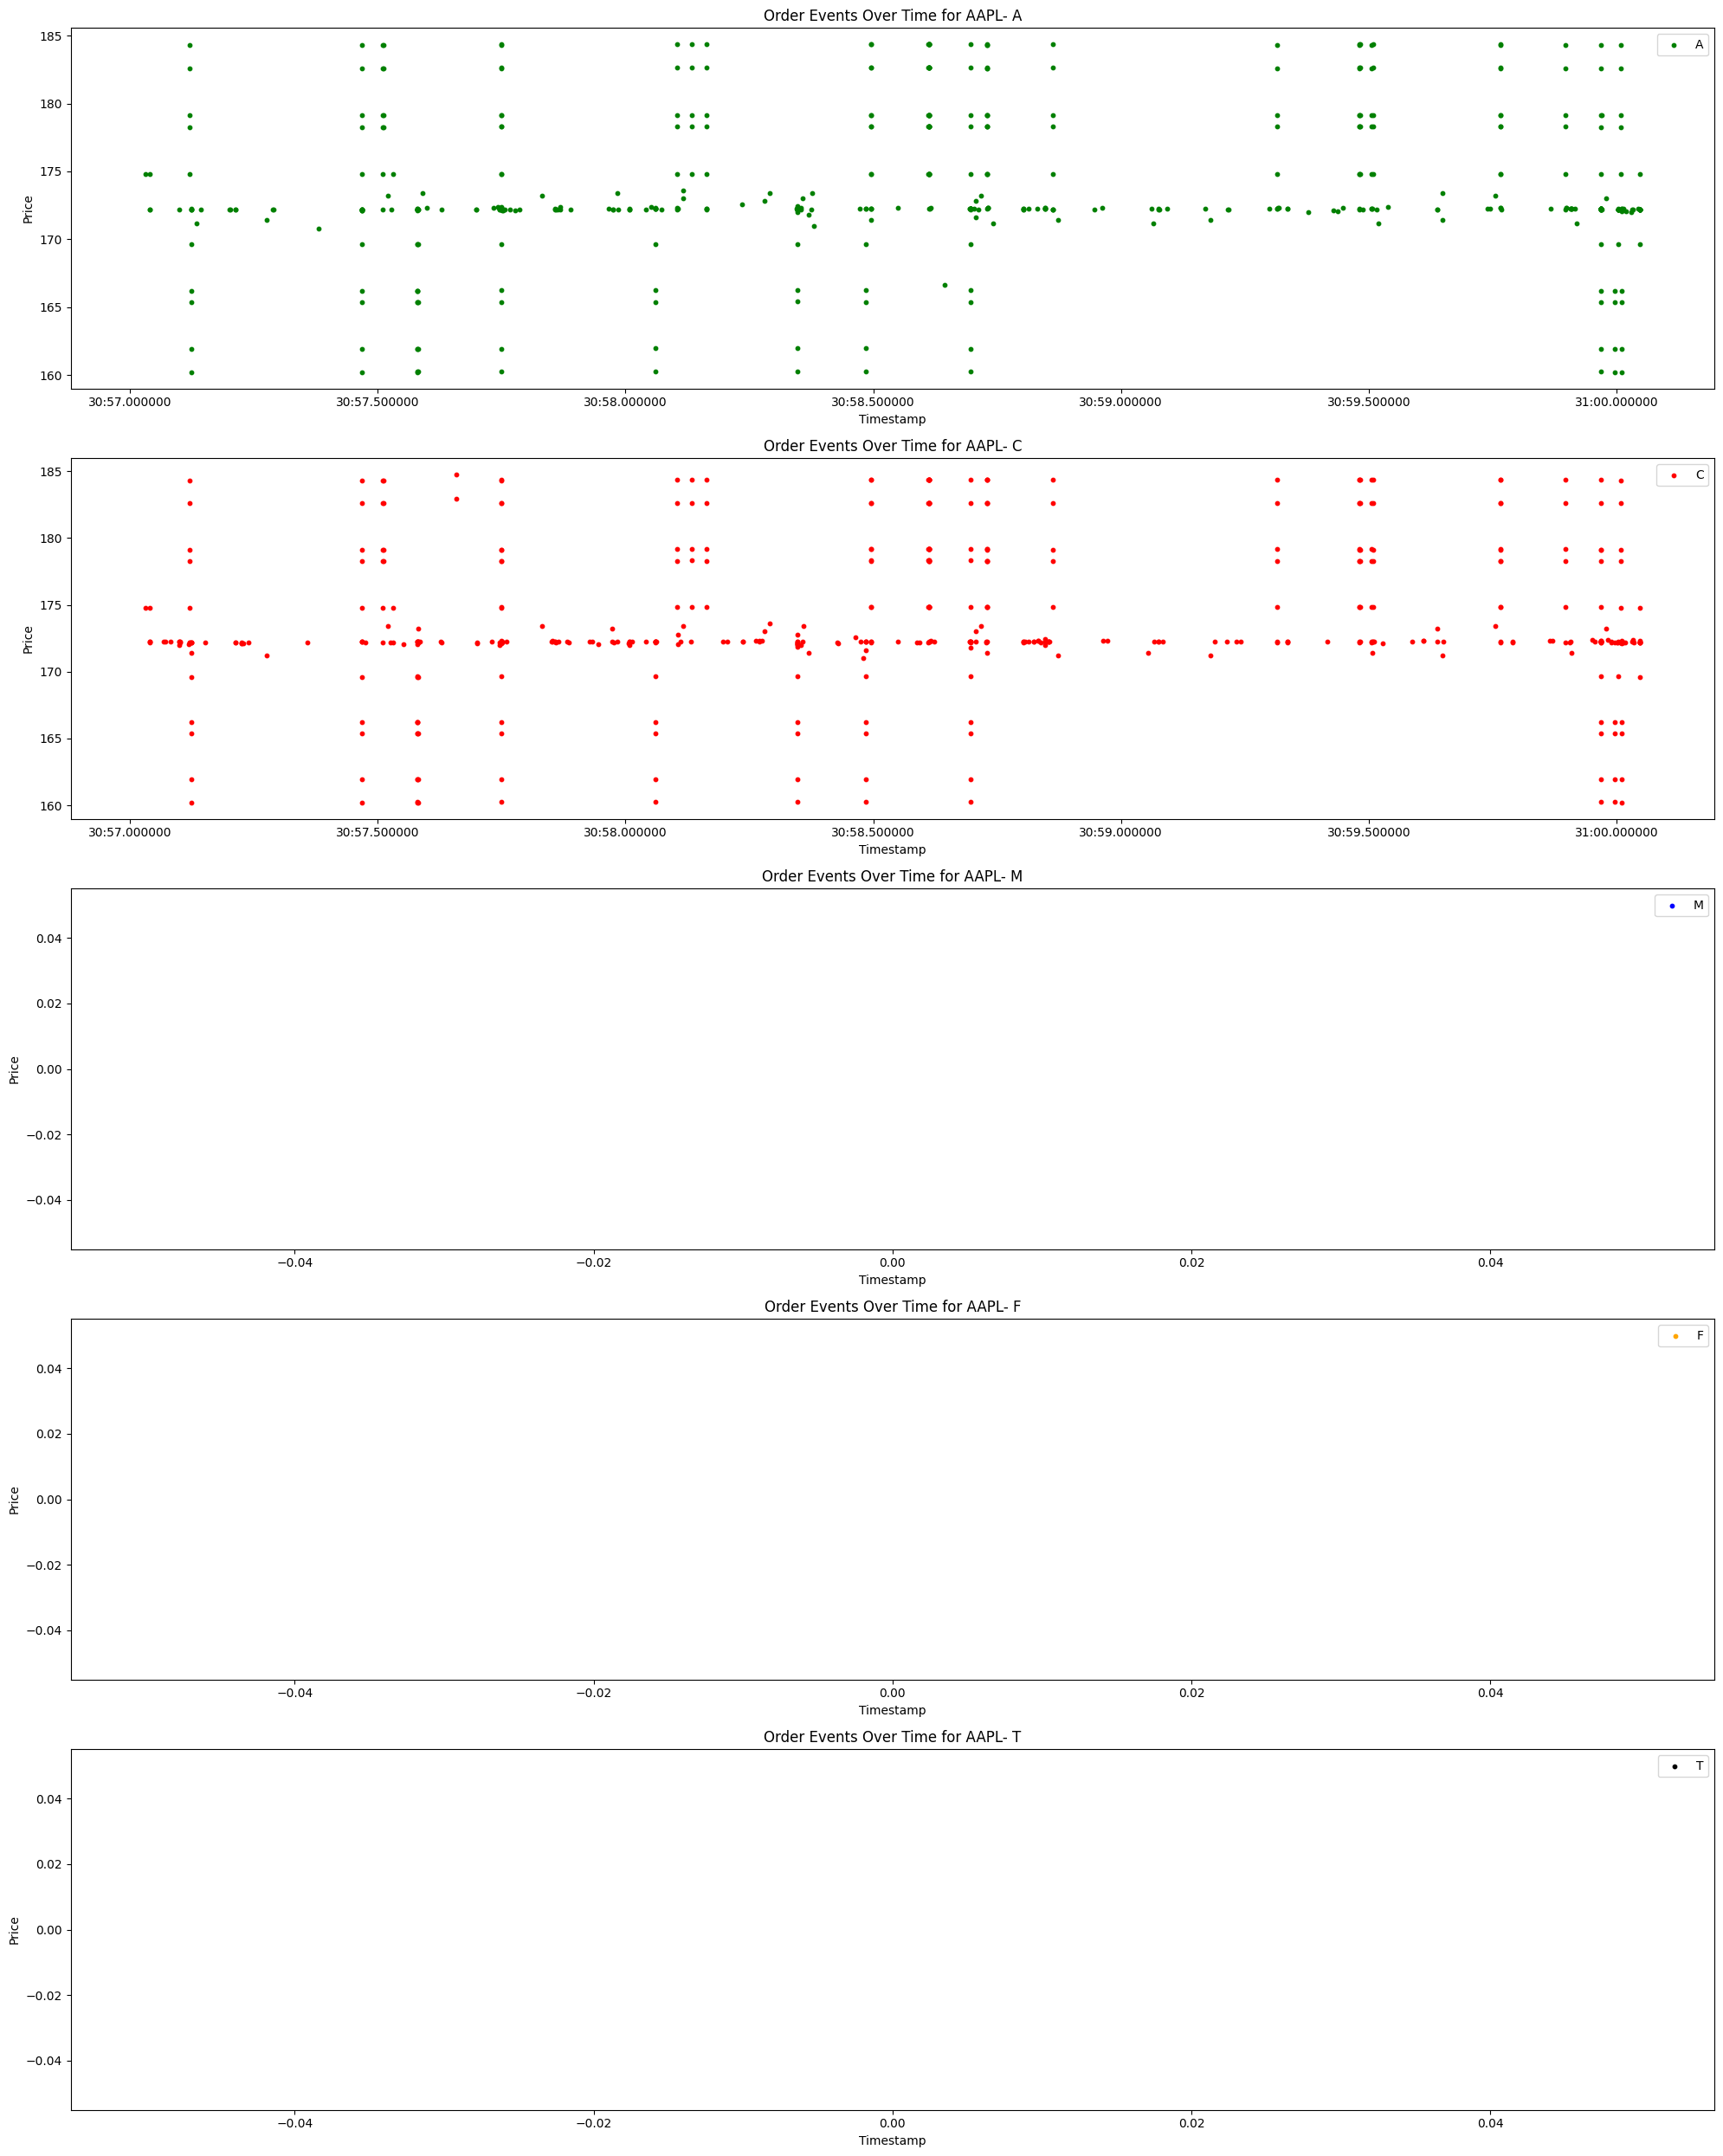

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

color_map = {'A': 'green', 'C': 'red', 'M': 'blue', 'F': 'orange', 'T': 'black'}

# Determine the number of rows and columns for the subplot grid
n = len(color_map)
ncols = 1  # Number of columns
nrows = n  # Number of rows; one row per event type

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * n))  # Adjusting figure size based on number of subplots

for i, (event_type, color) in enumerate(color_map.items()):
    subset = test_HFT_df[test_HFT_df['action'] == event_type]

    axs[i].scatter(subset['ts_recv'], subset['price'], s=10, c=color, label=event_type)
    axs[i].legend()
    axs[i].set_xlabel('Timestamp')  # Assuming 'ts_event' is a timestamp. Adjust label as necessary.
    axs[i].set_ylabel('Price')
    axs[i].set_title(f'Order Events Over Time for AAPL' + f'- {event_type}')

plt.tight_layout()  # Adjusts spacing between subplots for better readability
plt.show()

## MBP-10

### preliminary data analysis and visualisation of orderbook

In [68]:
df2 = get_data(client,'XNAS.ITCH','AAPL','mbp-10',start="2023-10-25T00:00",end="2023-10-26T00:00",write=True)

In [69]:
df2['ts_event'] = pd.to_datetime(df2['ts_event'],unit='ns')
df2['ts_recv'] = pd.to_datetime(df2['ts_recv'],unit='ns')

In [70]:
df2.head()

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,...,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
0,2023-10-25 08:00:00.012914846+00:00,2023-10-25 08:00:00.012748102+00:00,10,2,30,A,N,0,163.50,12,...,0,0,0,NaN,NaN,0,0,0,0,AAPL
1,2023-10-25 08:00:00.035435443+00:00,2023-10-25 08:00:00.035268283+00:00,10,2,30,A,N,0,174.58,333,...,0,0,0,NaN,NaN,0,0,0,0,AAPL
2,2023-10-25 08:00:00.036441220+00:00,2023-10-25 08:00:00.036273978+00:00,10,2,30,A,N,0,170.78,333,...,0,0,0,NaN,NaN,0,0,0,0,AAPL
3,2023-10-25 08:00:00.079003778+00:00,2023-10-25 08:00:00.078802758+00:00,10,2,30,A,N,0,172.46,400,...,0,0,0,NaN,NaN,0,0,0,0,AAPL
4,2023-10-25 08:00:00.079237430+00:00,2023-10-25 08:00:00.079002708+00:00,10,2,30,A,N,0,172.86,400,...,0,0,0,NaN,NaN,0,0,0,0,AAPL


In [71]:
df2.columns

Index(['ts_recv', 'ts_event', 'rtype', 'publisher_id', 'instrument_id',
       'action', 'side', 'depth', 'price', 'size', 'flags', 'ts_in_delta',
       'sequence', 'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
       'bid_ct_00', 'ask_ct_00', 'bid_px_01', 'ask_px_01', 'bid_sz_01',
       'ask_sz_01', 'bid_ct_01', 'ask_ct_01', 'bid_px_02', 'ask_px_02',
       'bid_sz_02', 'ask_sz_02', 'bid_ct_02', 'ask_ct_02', 'bid_px_03',
       'ask_px_03', 'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03',
       'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04',
       'ask_ct_04', 'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05',
       'bid_ct_05', 'ask_ct_05', 'bid_px_06', 'ask_px_06', 'bid_sz_06',
       'ask_sz_06', 'bid_ct_06', 'ask_ct_06', 'bid_px_07', 'ask_px_07',
       'bid_sz_07', 'ask_sz_07', 'bid_ct_07', 'ask_ct_07', 'bid_px_08',
       'ask_px_08', 'bid_sz_08', 'ask_sz_08', 'bid_ct_08', 'ask_ct_08',
       'bid_px_09', 'ask_px_09', 'bid_sz_09', 'ask_sz_09', 'bi

In [72]:
bid_price_columns = [col for col in df2.columns if 'bid_px_' in col]
bid_size_columns = [col for col in df2.columns if 'bid_sz_' in col]
ask_price_columns = [col for col in df2.columns if 'ask_px_' in col]
ask_size_columns = [col for col in df2.columns if 'ask_sz_' in col]
heatmap_data = pd.DataFrame()

for i in range(len(bid_price_columns)):
    temp_df = df2[['ts_event', bid_price_columns[i], bid_size_columns[i]]].copy()
    temp_df.rename(columns={bid_price_columns[i]: 'price', bid_size_columns[i]: 'volume'}, inplace=True)
    heatmap_data = pd.concat([heatmap_data, temp_df])
for i in range(len(ask_price_columns)):
    temp_df = df2[['ts_event', ask_price_columns[i], ask_size_columns[i]]].copy()
    temp_df.rename(columns={ask_price_columns[i]: 'price', ask_size_columns[i]: 'volume'}, inplace=True)
    temp_df['volume'] = -temp_df['volume']
    heatmap_data = pd.concat([heatmap_data, temp_df])

In [73]:
heatmap_data = heatmap_data.groupby(['ts_event', 'price']).sum().reset_index()

In [74]:
heatmap_data_pivot = heatmap_data.pivot(index = 'ts_event', columns = 'price', values = 'volume')

In [75]:
heatmap_data_pivot = heatmap_data_pivot.iloc[:, ::-1]

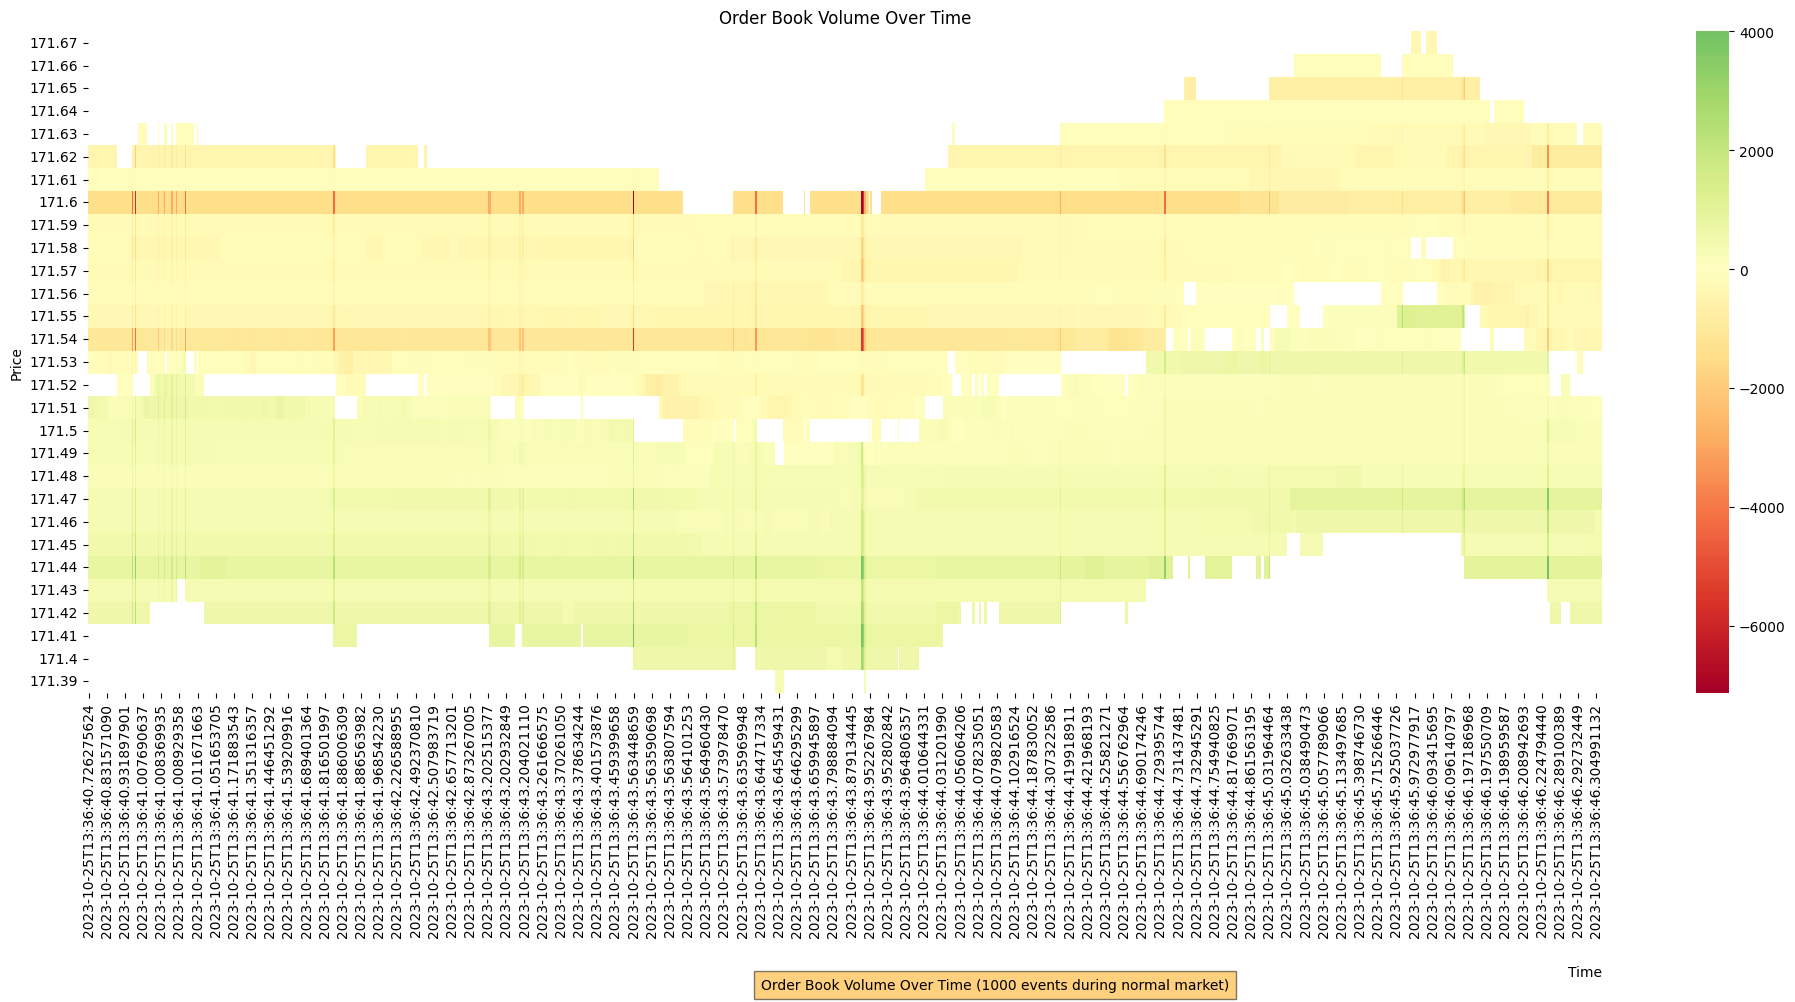

In [76]:
# Create the heatmap
plt.figure(figsize=(20, 10))
plot_map_df = heatmap_data_pivot[100000:101000].dropna(axis=1, how='all').T
sns.heatmap(plot_map_df, cmap='RdYlGn', center=0) # Use 'RdYlGn' colormap for green and red colors
plt.figtext(0.5, 0.005,'Order Book Volume Over Time (1000 events during normal market)', ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.title('Order Book Volume Over Time')
plt.xlabel('Time', labelpad=20, loc='right')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

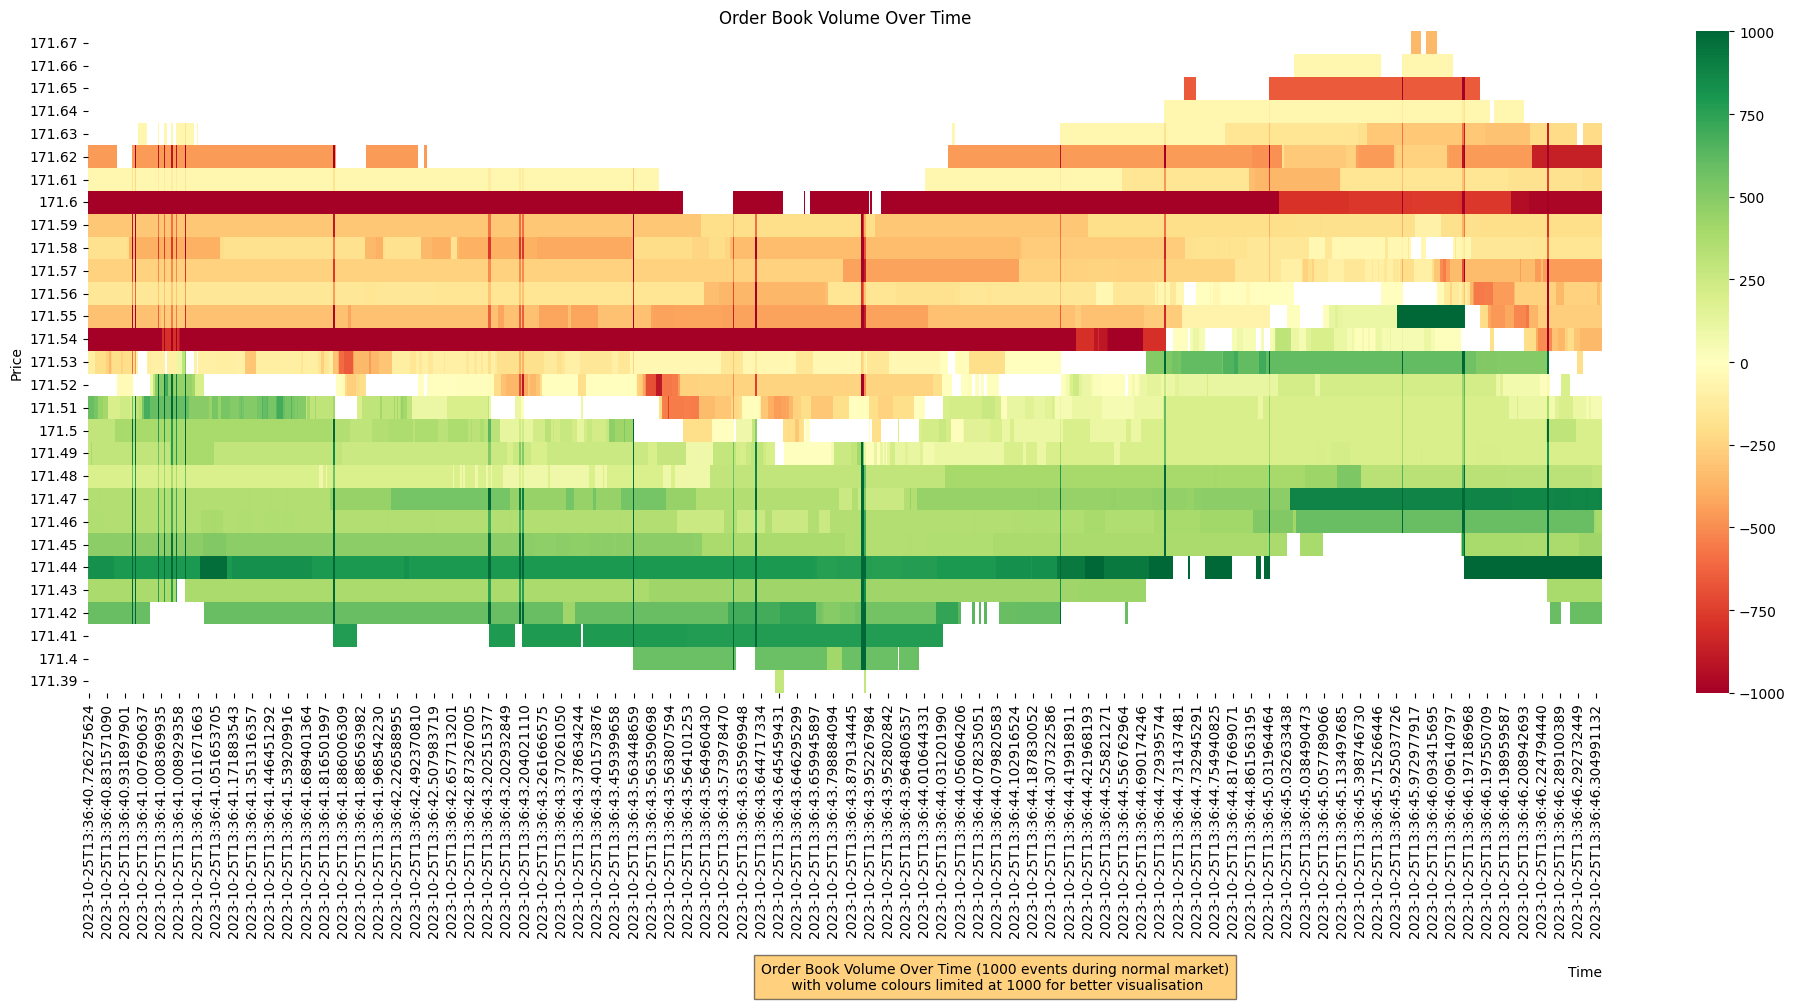

In [77]:
# Create the heatmap
plt.figure(figsize=(20, 10))
plot_map_df = heatmap_data_pivot[100000:101000].dropna(axis=1, how='all').T
sns.heatmap(plot_map_df, cmap='RdYlGn', center=0, vmin = -1000 , vmax = 1000)
plt.figtext(0.5, 0.005,'Order Book Volume Over Time (1000 events during normal market)\n with volume colours limited at 1000 for better visualisation', ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.title('Order Book Volume Over Time')
plt.xlabel('Time', labelpad=20, loc='right')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

#### time difference between orderbook snapshots 

In [174]:
recv_delta = df2.ts_recv.diff().dt.total_seconds() * 1e9
event_delta = df2.ts_event.diff().dt.total_seconds() * 1e9

In [175]:
recv_delta = recv_delta[1:] + 0.01
event_delta = event_delta[1:] + 0.01
recv_delta = recv_delta.apply(np.log10)
event_delta = event_delta.apply(np.log10)
recv_delta = recv_delta.replace([-2],0)
event_delta = event_delta.replace([-2],0)

In [176]:
recv_delta.describe()

count    2.346826e+06
mean     5.303643e+00
std      1.663274e+00
min      0.000000e+00
25%      4.367002e+00
50%      5.221147e+00
75%      6.489671e+00
max      1.089119e+01
Name: ts_recv, dtype: float64

In [177]:
event_delta.describe()

count    2.346826e+06
mean     5.307205e+00
std      1.654417e+00
min      0.000000e+00
25%      4.370754e+00
50%      5.222115e+00
75%      6.489717e+00
max      1.089119e+01
Name: ts_event, dtype: float64

In [178]:
recv_delta.dropna(inplace=True)
event_delta.dropna(inplace=True)

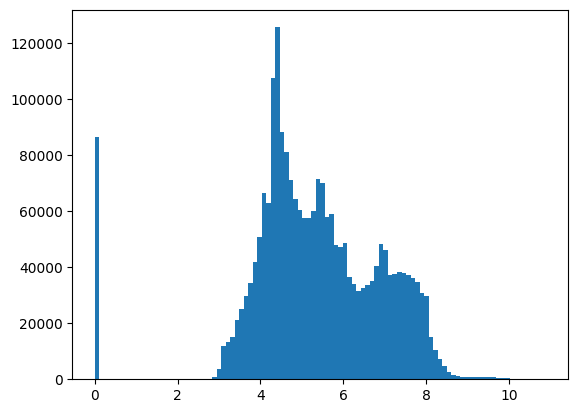

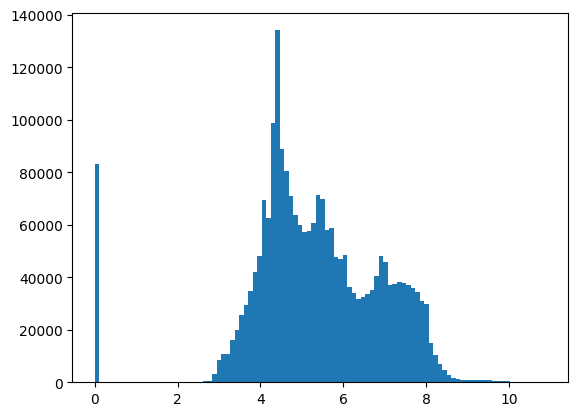

In [179]:
plt.hist(recv_delta,bins = 100)
plt.show()
plt.hist(event_delta,bins = 100)
plt.show()

#### time difference between events and recieve time

count    2.346827e+06
mean     1.690378e+05
std      1.883692e+04
min      1.657300e+05
25%      1.665710e+05
50%      1.669310e+05
75%      1.682240e+05
max      9.492021e+06
dtype: float64


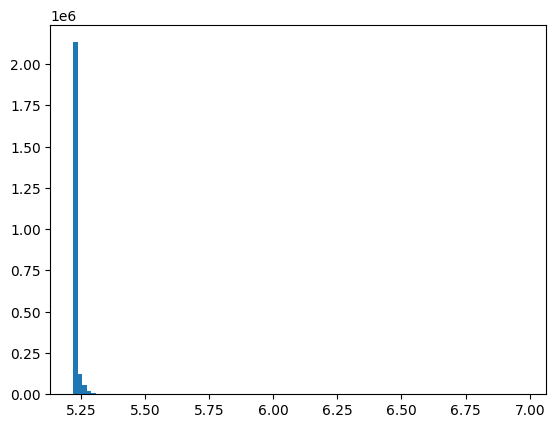

In [180]:
time_diff = df2.ts_recv - df2.ts_event
time_diff = time_diff.dt.total_seconds() * 1e9
print(time_diff.describe())
time_diff = time_diff.apply(np.log10)
plt.hist(time_diff,bins = 100)
plt.show()

## time analysis of MBO

We take the 75% level as our reference for individual timesteps in our strategy based off the order book update times above.
let's approximate it to 0.001 s or 1 millisecond 

let's look at number MBOs in every milisecond

In [181]:
# Function to count events per specified interval (in milliseconds)
def count_events_per_interval(df, time_column, interval_ms):
    # Convert the time column to datetime format
    df[time_column] = pd.to_datetime(df[time_column])

    # Round the datetime to the nearest specified interval
    interval_str = f'{interval_ms}ms'  # Create interval string
    df['rounded_time'] = df[time_column].dt.floor(interval_str)

    # Count the number of events per specified interval
    event_count = df.groupby('rounded_time').size()

    return event_count

# Usage of the function with a 3-millisecond interval
event_count = count_events_per_interval(df1, 'ts_recv', 1)
print(event_count)


rounded_time
2023-10-25 08:00:00.012000+00:00    1
2023-10-25 08:00:00.035000+00:00    1
2023-10-25 08:00:00.036000+00:00    1
2023-10-25 08:00:00.079000+00:00    2
2023-10-25 08:00:00.083000+00:00    3
                                   ..
2023-10-25 23:59:59.938000+00:00    1
2023-10-25 23:59:59.943000+00:00    1
2023-10-25 23:59:59.954000+00:00    1
2023-10-25 23:59:59.997000+00:00    1
2023-10-25 23:59:59.999000+00:00    1
Length: 1206723, dtype: int64


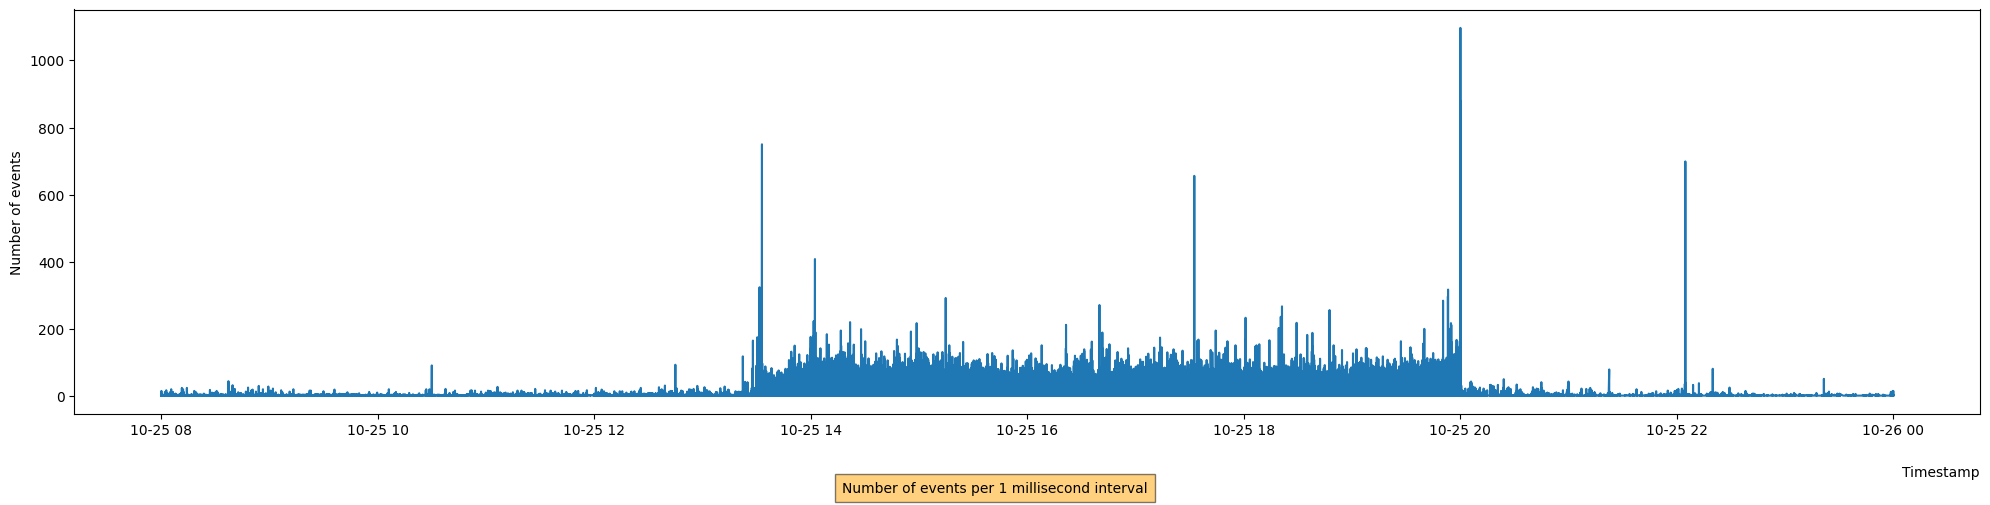

In [182]:
plt.figure(figsize=(20, 5))
plt.plot(event_count)
plt.figtext(0.5, 0.005,'Number of events per 1 millisecond interval', ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.xlabel('Timestamp', labelpad=20, loc='right')
plt.ylabel('Number of events')
plt.tight_layout()
plt.show()

In [183]:
event_count.describe()

count    1.206723e+06
mean     4.584940e+00
std      1.026857e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      1.097000e+03
dtype: float64

we see the orders are spaced further than that 

In [184]:
for milisecond in range(1, 1000):
    event_count = count_events_per_interval(df1, 'ts_event', milisecond)
    print(f'Interval: {milisecond}ms , minimum orders per interval: {event_count.min()}')
    if event_count.min() > 1:
        break

Interval: 1ms , minimum orders per interval: 1
Interval: 2ms , minimum orders per interval: 1
Interval: 3ms , minimum orders per interval: 1
Interval: 4ms , minimum orders per interval: 1
Interval: 5ms , minimum orders per interval: 1
Interval: 6ms , minimum orders per interval: 1
Interval: 7ms , minimum orders per interval: 1
Interval: 8ms , minimum orders per interval: 1
Interval: 9ms , minimum orders per interval: 1
Interval: 10ms , minimum orders per interval: 1
Interval: 11ms , minimum orders per interval: 1
Interval: 12ms , minimum orders per interval: 1
Interval: 13ms , minimum orders per interval: 1
Interval: 14ms , minimum orders per interval: 1
Interval: 15ms , minimum orders per interval: 1
Interval: 16ms , minimum orders per interval: 1
Interval: 17ms , minimum orders per interval: 1
Interval: 18ms , minimum orders per interval: 1
Interval: 19ms , minimum orders per interval: 1
Interval: 20ms , minimum orders per interval: 1
Interval: 21ms , minimum orders per interval: 1
I

KeyboardInterrupt: 

## Analysis of orders 

In [185]:
ordered_df = df1.sort_values(by=['order_id'])
filtered_df = ordered_df.groupby('order_id').filter(lambda x: len(x) > 1)
# Convert ts_event to datetime
filtered_df['ts_event'] = pd.to_datetime(filtered_df['ts_event'])

# Group by 'order_id' and sort each group by 'ts_event'
grouped_sorted_df = filtered_df.groupby('order_id', group_keys=False).apply(lambda x: x.sort_values('ts_event'))

In [ ]:
grouped_sorted_df

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol,rounded_time
236,2023-10-25 08:00:11.883359114+00:00,2023-10-25 08:00:11.883191321+00:00,160,2,30,T,B,172.78,27,0,0,130,167793,318802,AAPL,2023-10-25 08:00:11.268000+00:00
245,2023-10-25 08:00:11.883455406+00:00,2023-10-25 08:00:11.883288096+00:00,160,2,30,T,N,172.70,50,0,0,130,167310,318809,AAPL,2023-10-25 08:00:11.268000+00:00
267,2023-10-25 08:00:12.576001498+00:00,2023-10-25 08:00:12.575831229+00:00,160,2,30,T,N,172.64,50,0,0,0,170269,319512,AAPL,2023-10-25 08:00:12.267000+00:00
269,2023-10-25 08:00:12.576001498+00:00,2023-10-25 08:00:12.575831229+00:00,160,2,30,T,N,172.62,50,0,0,0,170269,319514,AAPL,2023-10-25 08:00:12.267000+00:00
268,2023-10-25 08:00:12.576001498+00:00,2023-10-25 08:00:12.575831229+00:00,160,2,30,T,N,172.62,50,0,0,0,170269,319513,AAPL,2023-10-25 08:00:12.267000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532688,2023-10-25 23:59:57.114646965+00:00,2023-10-25 23:59:57.114479475+00:00,160,2,30,F,A,169.30,5,0,671730177,130,167490,690011259,AAPL,2023-10-25 23:59:56.625000+00:00
5532692,2023-10-25 23:59:57.114770228+00:00,2023-10-25 23:59:57.114602818+00:00,160,2,30,C,A,169.30,10,0,671730177,130,167410,690011261,AAPL,2023-10-25 23:59:56.625000+00:00
5532691,2023-10-25 23:59:57.114770228+00:00,2023-10-25 23:59:57.114602818+00:00,160,2,30,F,A,169.30,10,0,671730177,130,167410,690011261,AAPL,2023-10-25 23:59:56.625000+00:00
5532695,2023-10-25 23:59:57.334634654+00:00,2023-10-25 23:59:57.334465612+00:00,160,2,30,C,A,169.30,752,0,671730177,130,169042,690011281,AAPL,2023-10-25 23:59:56.625000+00:00


In [ ]:
haha = grouped_sorted_df[grouped_sorted_df['action'].isin(['C','F','A','M'])]
haha = haha.groupby('order_id').filter(lambda x: len(x) > 5)

KeyboardInterrupt: 

In [ ]:
haha

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol,rounded_time
270,2023-10-25 08:00:12.576001498+00:00,2023-10-25 08:00:12.575831229+00:00,160,2,30,A,A,172.6,150,0,154449,130,170269,319515,AAPL,2023-10-25 08:00:12.267000+00:00
272,2023-10-25 08:00:12.576036694+00:00,2023-10-25 08:00:12.575868632+00:00,160,2,30,F,A,172.6,50,0,154449,130,168062,319516,AAPL,2023-10-25 08:00:12.267000+00:00
273,2023-10-25 08:00:12.576036694+00:00,2023-10-25 08:00:12.575868632+00:00,160,2,30,C,A,172.6,50,0,154449,130,168062,319516,AAPL,2023-10-25 08:00:12.267000+00:00
276,2023-10-25 08:00:12.576248976+00:00,2023-10-25 08:00:12.576080939+00:00,160,2,30,C,A,172.6,100,0,154449,130,168037,319517,AAPL,2023-10-25 08:00:12.267000+00:00
275,2023-10-25 08:00:12.576248976+00:00,2023-10-25 08:00:12.576080939+00:00,160,2,30,F,A,172.6,100,0,154449,130,168037,319517,AAPL,2023-10-25 08:00:12.267000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532688,2023-10-25 23:59:57.114646965+00:00,2023-10-25 23:59:57.114479475+00:00,160,2,30,F,A,169.3,5,0,671730177,130,167490,690011259,AAPL,2023-10-25 23:59:56.625000+00:00
5532692,2023-10-25 23:59:57.114770228+00:00,2023-10-25 23:59:57.114602818+00:00,160,2,30,C,A,169.3,10,0,671730177,130,167410,690011261,AAPL,2023-10-25 23:59:56.625000+00:00
5532691,2023-10-25 23:59:57.114770228+00:00,2023-10-25 23:59:57.114602818+00:00,160,2,30,F,A,169.3,10,0,671730177,130,167410,690011261,AAPL,2023-10-25 23:59:56.625000+00:00
5532695,2023-10-25 23:59:57.334634654+00:00,2023-10-25 23:59:57.334465612+00:00,160,2,30,C,A,169.3,752,0,671730177,130,169042,690011281,AAPL,2023-10-25 23:59:56.625000+00:00


In [ ]:
haha_orders = haha.order_id.unique()

In [ ]:
haha_orders

array([   154449,    156041,    195177, ..., 671724981, 671727997,
       671730177], dtype=uint64)

In [ ]:
order_list = np.random.choice(haha_orders, 10, replace=False)

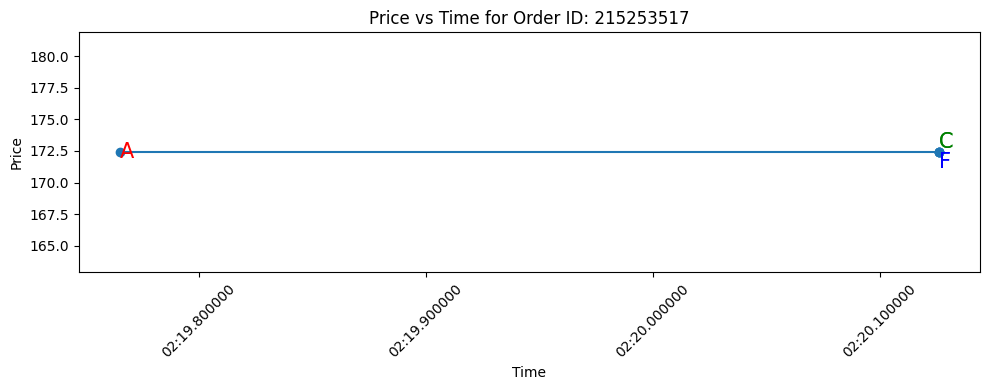

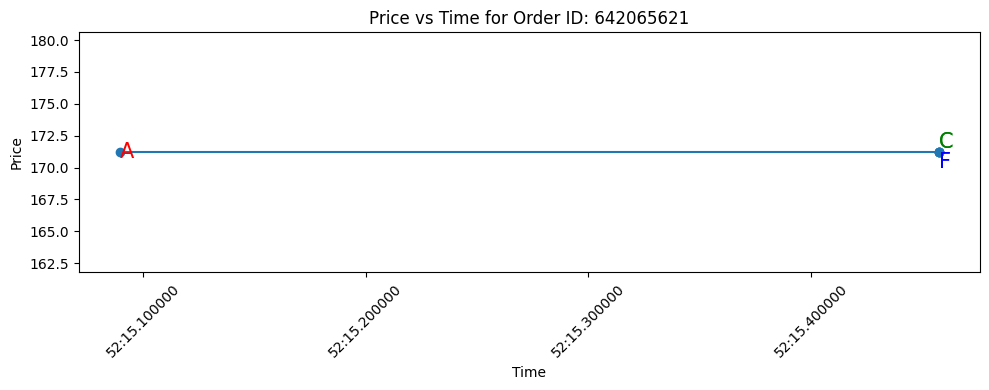

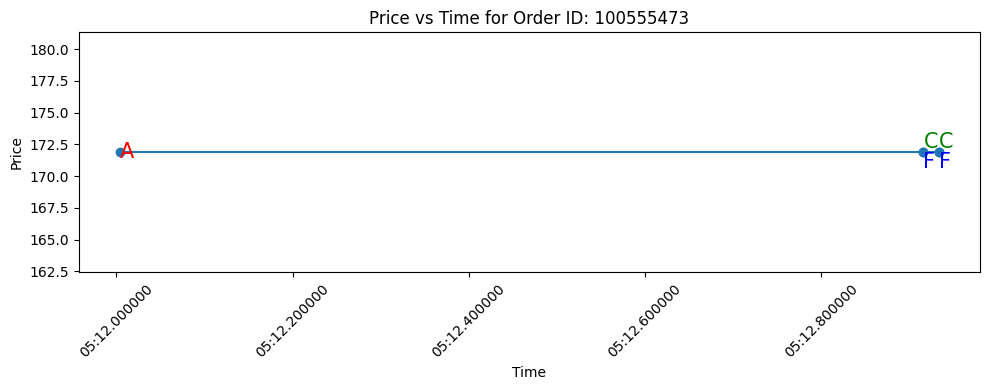

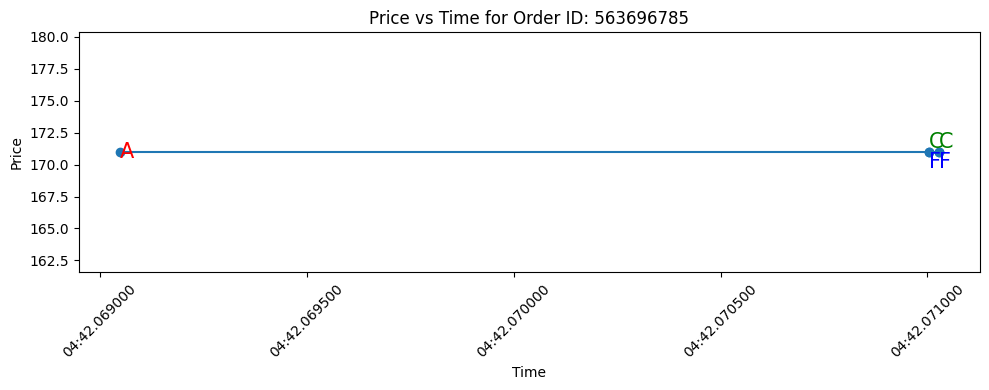

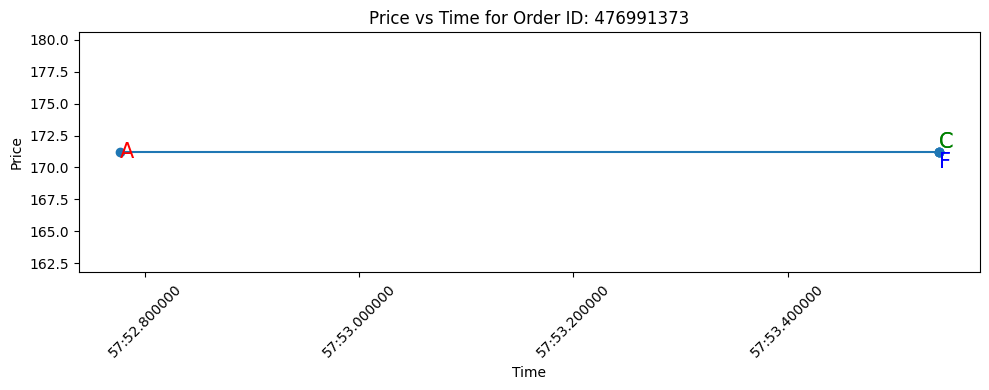

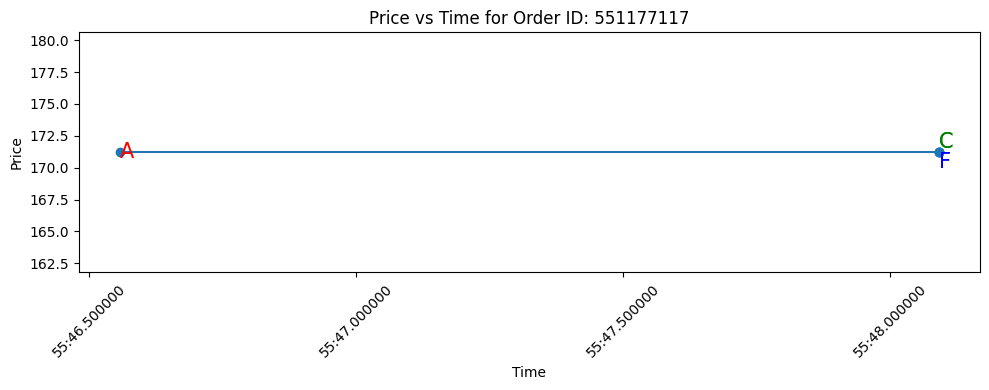

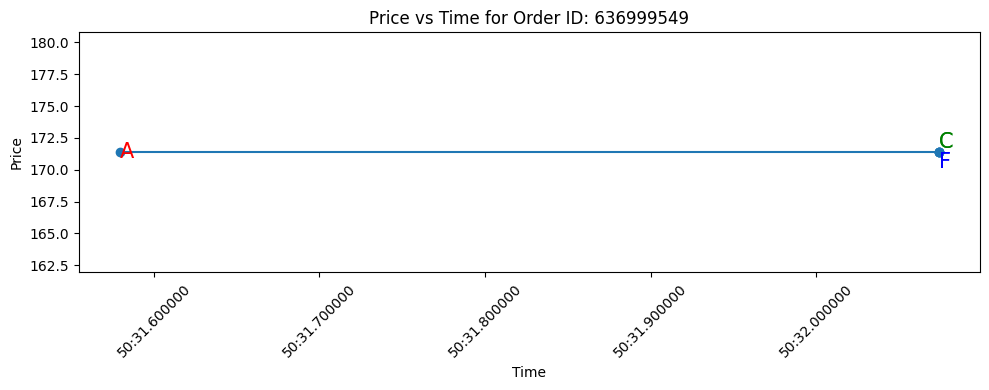

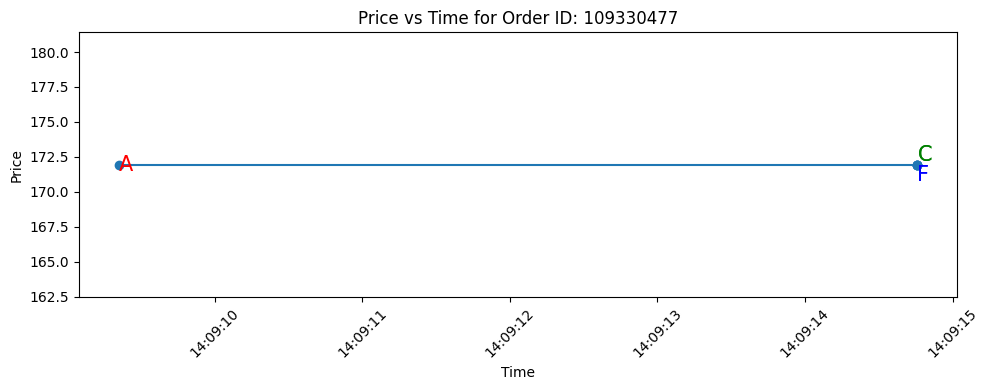

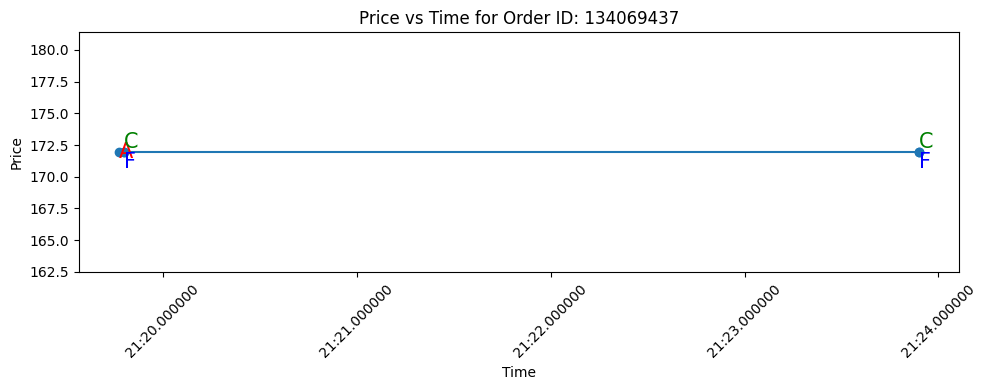

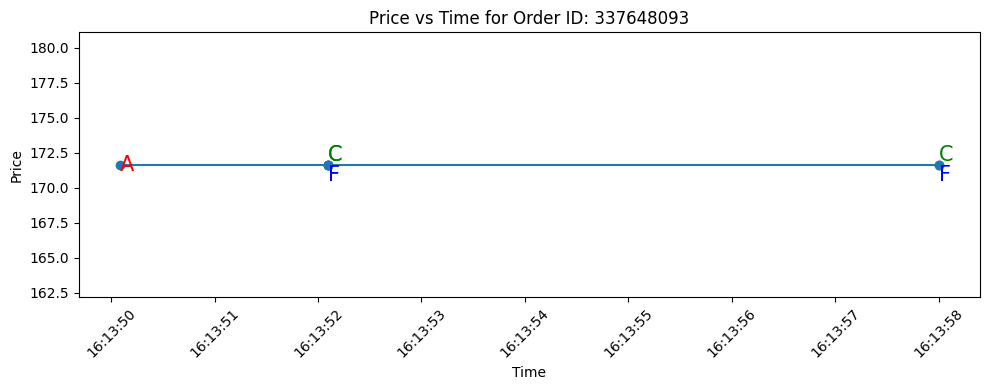

In [ ]:
for order in order_list:
    order_life = df1[df1['order_id'] == order].sort_values(by=['ts_event'])
    plt.figure(figsize=(10, 4))  # Optional: Adjust figure size
    plt.plot(order_life['ts_event'], order_life['price'], marker='o')  # 'o' for round markers
    plt.title(f"Price vs Time for Order ID: {order}")
    plt.xlabel("Time")
    plt.ylabel("Price")

    # Annotate each point with its action
    for index, row in order_life.iterrows():
        if row['action'] == 'A':
            plt.text(row['ts_event'], row['price'], row['action'], fontsize=15, verticalalignment='center', color='red')
        elif row['action'] == 'F':
            plt.text(row['ts_event'], row['price'], row['action'], fontsize=15, verticalalignment='top', color='blue')
        else:
            plt.text(row['ts_event'], row['price'], row['action'], fontsize=15, verticalalignment='bottom', color='green')

    plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
    plt.tight_layout()  # Optional: Adjust layout
    plt.show()

**Ask Professor David regarding below**

orders have both cancel and trade messages and sometimes timesteps are different

In [ ]:
import scipy.stats as stats

ModuleNotFoundError: No module named 'scipy'

number of orders with both actions :-  2428


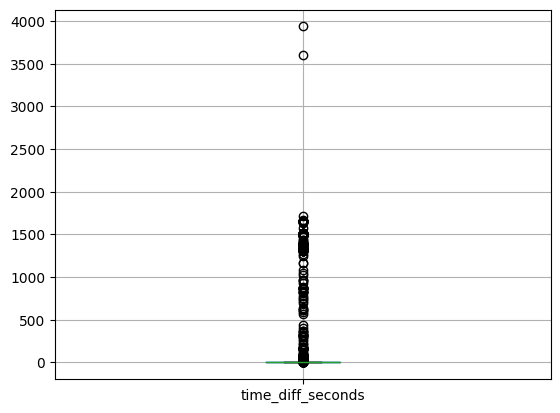

Average time difference between A and C: 0.37909956300000003 seconds
number of orders with both actions :-  531


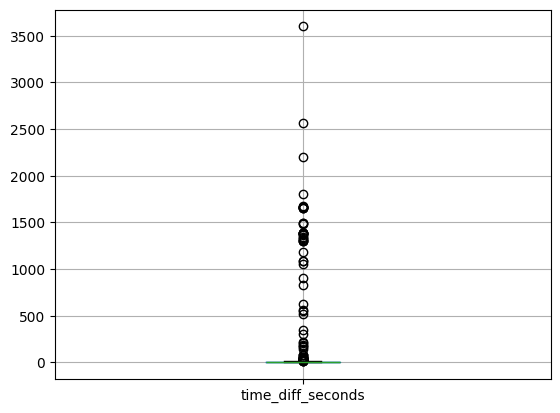

Average time difference between A and M: 1.630681586 seconds
number of orders with both actions :-  283


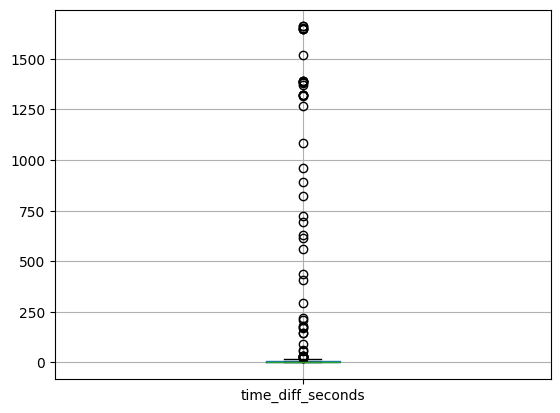

Average time difference between A and F: 1.02578914 seconds
number of orders with both actions :-  13


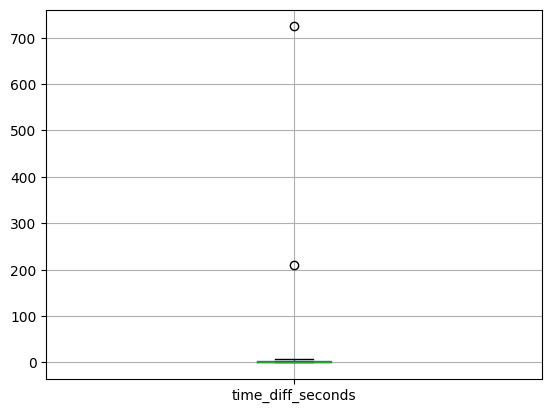

Average time difference between A and T: 0.0 seconds
number of orders with both actions :-  476


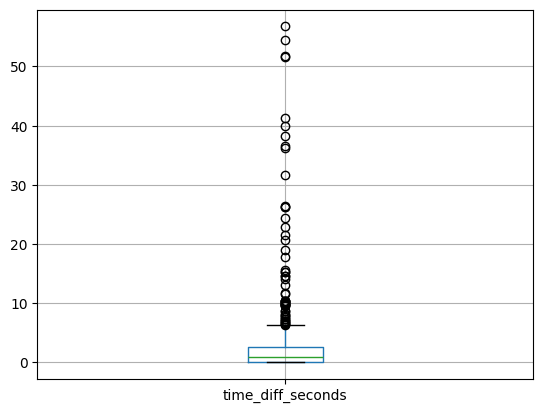

Average time difference between M and C: 0.850071319 seconds
number of orders with both actions :-  439


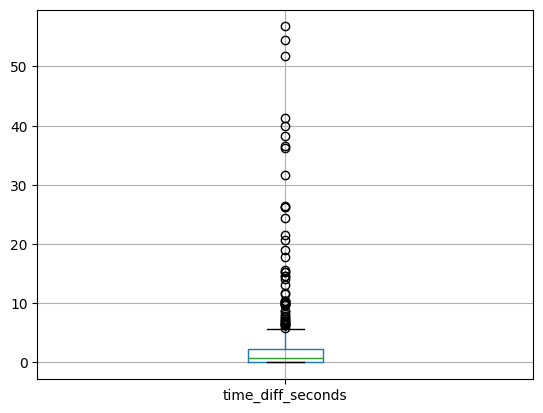

Average time difference between M and F: 0.743698548 seconds
number of orders with both actions :-  329


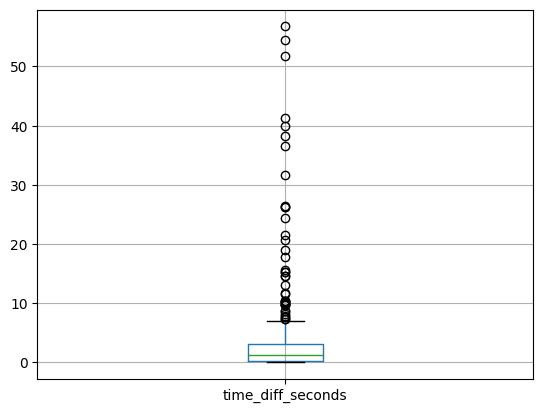

Average time difference between M and T: 1.160248996 seconds
number of orders with both actions :-  45


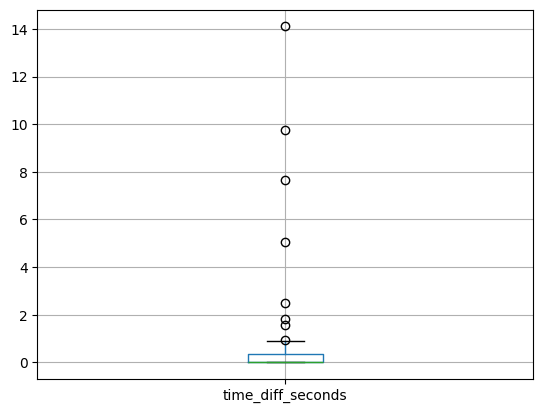

Average time difference between F and T: 3.124e-05 seconds


In [ ]:
combinations = [['A', 'C'], ['A', 'M'], ['A', 'F'], ['A', 'T'], ['M', 'C'], ['M', 'F'], ['M', 'T'], ['F', 'T']]
for combination in combinations:
    # Create a dataframe with only the specified actions
    subset_df = grouped_sorted_df[grouped_sorted_df['action'].isin(combination)]
    subset_df = subset_df.groupby('order_id').filter(lambda x: len(x) > 1)
    # Calculate the time difference between the actions
    subset_df['time_diff'] = subset_df.groupby('order_id')['ts_event'].diff()

    # Drop rows with NaN values
    subset_df.dropna(subset=['time_diff'], inplace=True)

    # Convert the time difference to seconds
    print('number of orders with both actions :- ', len(subset_df))
    subset_df['time_diff_seconds'] = subset_df['time_diff'].dt.total_seconds()

    # Calculate the average time difference
    avg_time_diff = subset_df['time_diff_seconds'].median()
    # plot a box plot of these time differences
    subset_df.boxplot(column='time_diff_seconds')
    plt.show()
    # Print the average time difference
    print(f'Average time difference between {combination[0]} and {combination[1]}: {avg_time_diff} seconds')

number of orders with both actions :-  2428


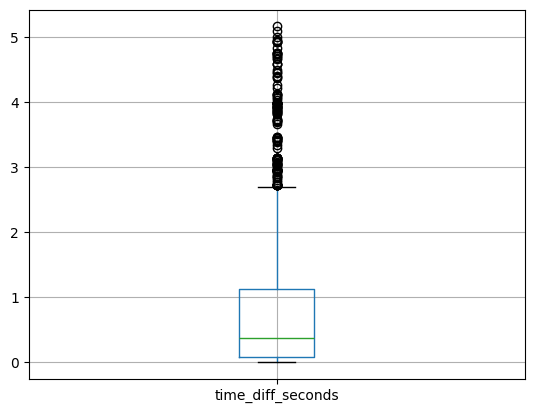

Median time difference between A and C: 0.37909956300000003 seconds
number of orders with both actions :-  531


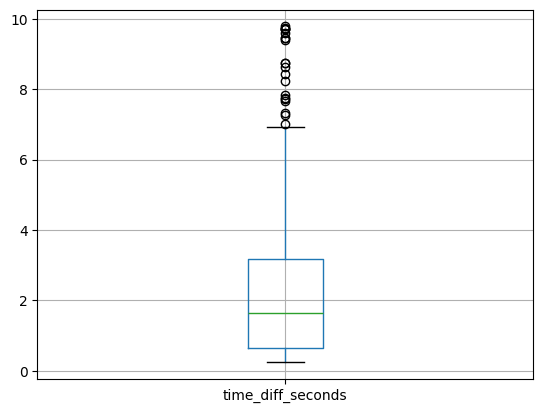

Median time difference between A and M: 1.630681586 seconds
number of orders with both actions :-  283


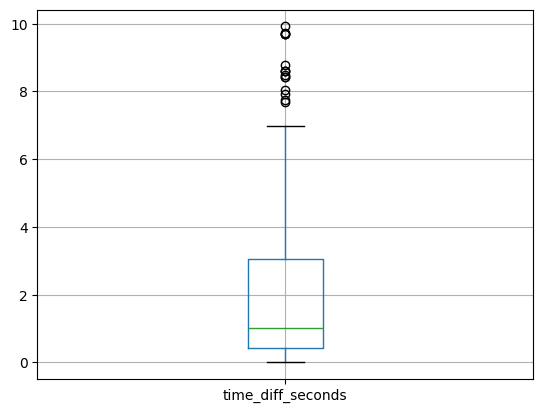

Median time difference between A and F: 1.02578914 seconds
number of orders with both actions :-  13


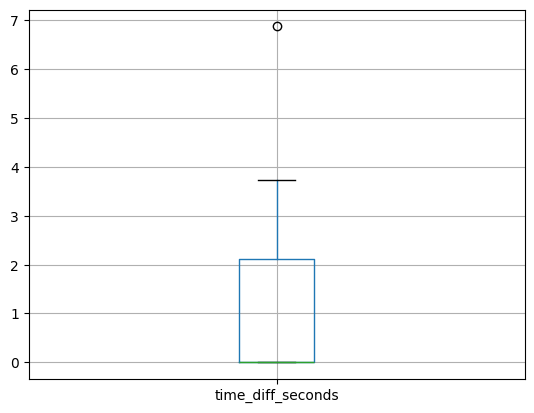

Median time difference between A and T: 0.0 seconds
number of orders with both actions :-  476


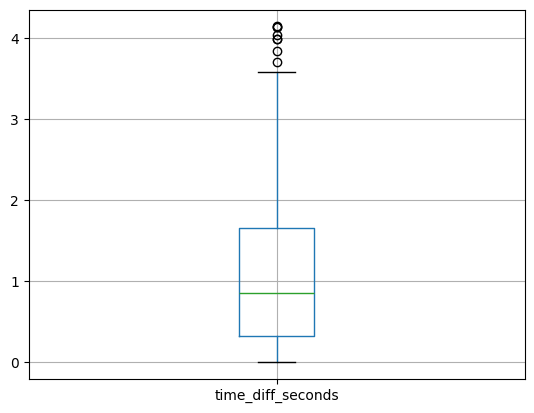

Median time difference between M and C: 0.850071319 seconds
number of orders with both actions :-  439


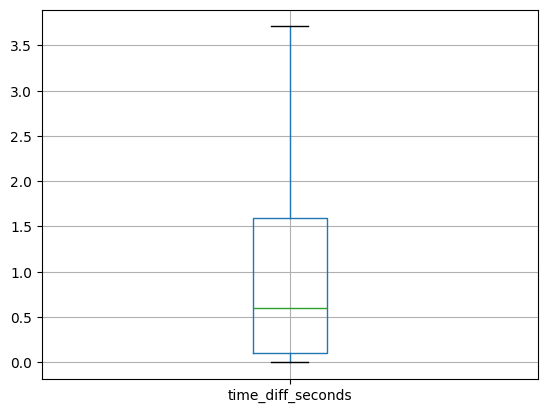

Median time difference between M and F: 0.601145084 seconds
number of orders with both actions :-  329


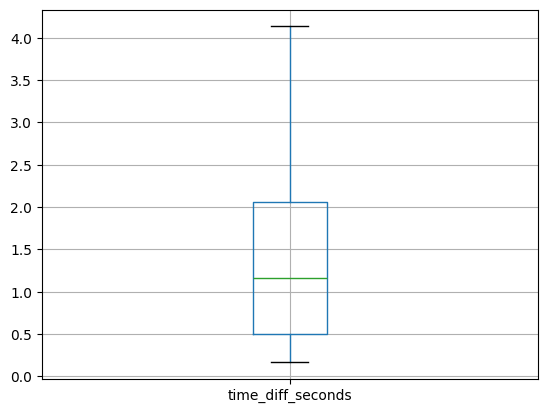

Median time difference between M and T: 1.160248996 seconds
number of orders with both actions :-  45


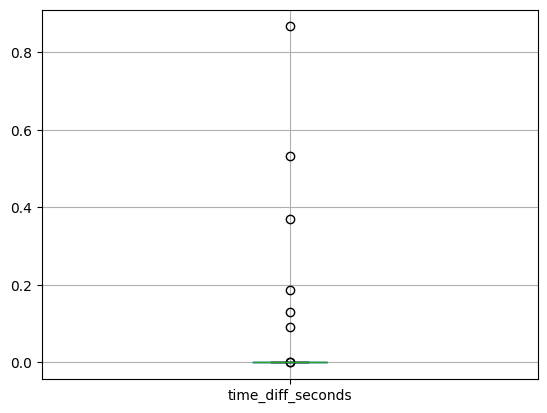

Median time difference between F and T: 9.642e-06 seconds


In [ ]:
combinations = [['A', 'C'], ['A', 'M'], ['A', 'F'], ['A', 'T'], ['M', 'C'], ['M', 'F'], ['M', 'T'], ['F', 'T']]
for combination in combinations:
    # Create a dataframe with only the specified actions
    subset_df = grouped_sorted_df[grouped_sorted_df['action'].isin(combination)]
    subset_df = subset_df.groupby('order_id').filter(lambda x: len(x) > 1)
    # Calculate the time difference between the actions
    subset_df['time_diff'] = subset_df.groupby('order_id')['ts_event'].diff()

    # Drop rows with NaN values
    subset_df.dropna(subset=['time_diff'], inplace=True)

    # Convert the time difference to seconds
    print('number of orders with both actions :- ', len(subset_df))
    subset_df['time_diff_seconds'] = subset_df['time_diff'].dt.total_seconds()

    # Calculate 10th and 90th percentiles for each action
    percentiles = subset_df.groupby('action')['time_diff_seconds'].quantile([0.2, 0.8]).unstack()

    # Filter data between 10th and 90th percentiles
    subset_df = subset_df[subset_df.apply(lambda row: percentiles.loc[row['action'], 0.2] <= row['time_diff_seconds'] <= percentiles.loc[row['action'], 0.8], axis=1)]

    # Calculate the average time difference
    avg_time_diff = subset_df['time_diff_seconds'].median()
    # plot a box plot of these time differences
    subset_df.boxplot(column='time_diff_seconds')
    plt.show()
    # Print the average time difference
    print(f'Median time difference between {combination[0]} and {combination[1]}: {avg_time_diff} seconds')
